# Data and Metric Setup

## Data Collection

In [64]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

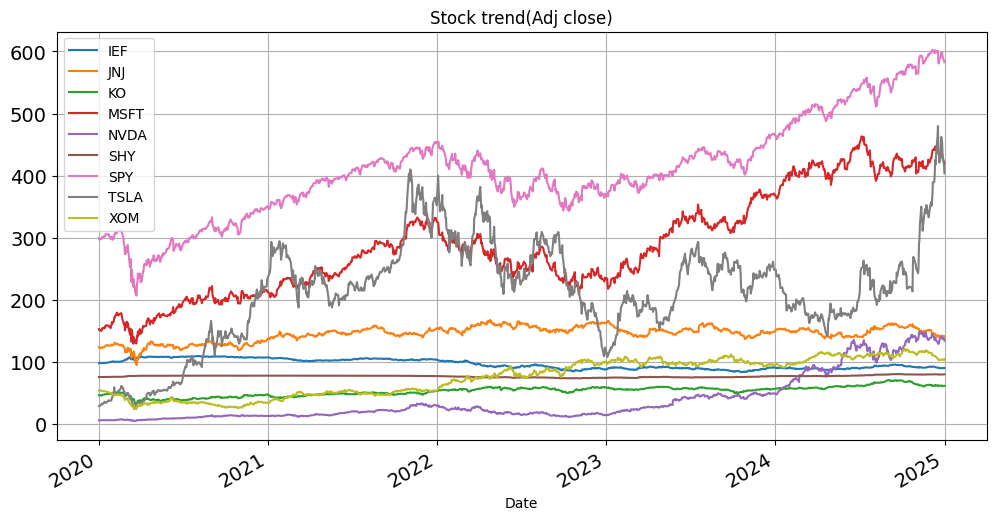

In [ ]:
tickers = ['KO', 'JNJ', 'MSFT', 'TSLA', 'NVDA', 'XOM', 'SPY', 'IEF', 'SHY']
data = yf.download(tickers, start="2020-01-01", end="2025-01-01", auto_adjust=False, group_by='column', threads=False, repair=True, progress=False)

adj=data['Adj Close'].ffill()


adj.plot(figsize=(12,6), fontsize=(14))
plt.title("Stock trend(Adj close)")
plt.grid()
plt.legend()
plt.show()

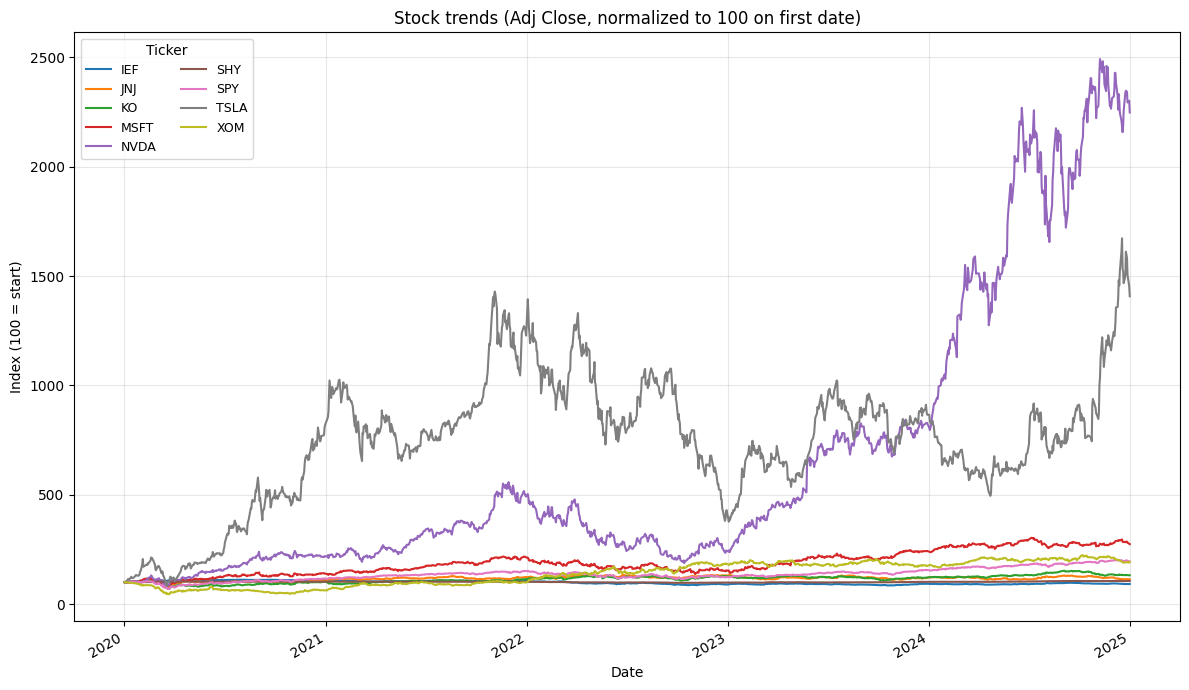

In [4]:
norm = adj.div(adj.iloc[0]).mul(100)

# Plot
plt.figure(figsize=(12, 7))
norm.plot(ax=plt.gca(), linewidth=1.5)
plt.title('Stock trends (Adj Close, normalized to 100 on first date)')
plt.xlabel('Date')
plt.ylabel('Index (100 = start)')
plt.grid(True, alpha=0.3)
plt.legend(title='Ticker', ncol=2, fontsize=9)
plt.tight_layout()
plt.show()

In [5]:
data.head()

Price       Adj Close                                                          \
Ticker            IEF         JNJ         KO        MSFT      NVDA        SHY   
Date                                                                            
2020-01-02  97.926269  124.073051  46.419693  152.791092  5.971410  75.627035   
2020-01-03  98.580727  122.636528  46.166454  150.888626  5.875832  75.689519   
2020-01-06  98.474577  122.483505  46.149570  151.278641  5.900474  75.662745   
2020-01-07  98.333116  123.231522  45.795033  149.899277  5.971908  75.662745   
2020-01-08  98.103142  123.214500  45.879448  152.287003  5.983109  75.627035   

Price                                              Close  ... Repaired?  \
Ticker             SPY       TSLA        XOM         IEF  ...       XOM   
Date                                                      ...             
2020-01-02  299.406464  28.684000  54.131081  110.730003  ...     False   
2020-01-03  297.139252  29.534000  53.695900  111.470001  ...     False   
2020-01-06  298.272888  30.102667  54.108170  111.349998  ...     False   
2020-01-07  297.434143  31.270666  53.665340  111.190002  ...     False   
2020-01-08  299.019379  32.809334  52.856064  110.930000  ...     False   

Price        Volume                                                   \
Ticker          IEF      JNJ        KO      MSFT       NVDA      SHY   
Date                                                                   
2020-01-02  4022300  5777000  11867700  22622100  237536000  2665200   
2020-01-03  3839600  5752400  11354500  21116200  205384000  2039900   
2020-01-06  2714300  7731300  14698300  20813700  262636000  1132100   
2020-01-07  2038800  7382900   9973900  21634100  314856000  1103400   
2020-01-08  5081100  6605800  10676000  27746500  277108000  1864300   

Price                                      
Ticker           SPY       TSLA       XOM  
Date                                       
2020-01-02  59151200  142981500  12456400  
2020-01-03  77709700  266677500  17386900  
2020-01-06  55653900  151995000  20081900  
2020-01-07  40496400  268231500  17387700  
2020-01-08  68296000  467164500  15137700  

[5 rows x 63 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2020-01-02 to 2024-12-31
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, IEF)   1258 non-null   float64
 1   (Adj Close, JNJ)   1258 non-null   float64
 2   (Adj Close, KO)    1258 non-null   float64
 3   (Adj Close, MSFT)  1258 non-null   float64
 4   (Adj Close, NVDA)  1258 non-null   float64
 5   (Adj Close, SHY)   1258 non-null   float64
 6   (Adj Close, SPY)   1258 non-null   float64
 7   (Adj Close, TSLA)  1258 non-null   float64
 8   (Adj Close, XOM)   1258 non-null   float64
 9   (Close, IEF)       1258 non-null   float64
 10  (Close, JNJ)       1258 non-null   float64
 11  (Close, KO)        1258 non-null   float64
 12  (Close, MSFT)      1258 non-null   float64
 13  (Close, NVDA)      1258 non-null   float64
 14  (Close, SHY)       1258 non-null   float64
 15  (Close, SPY)       1258 non-null   float64
 16  (Close

In [7]:
returns= adj.pct_change()
log_ret= np.log(adj).diff()


## Exploratory Data Analysis (EDA)

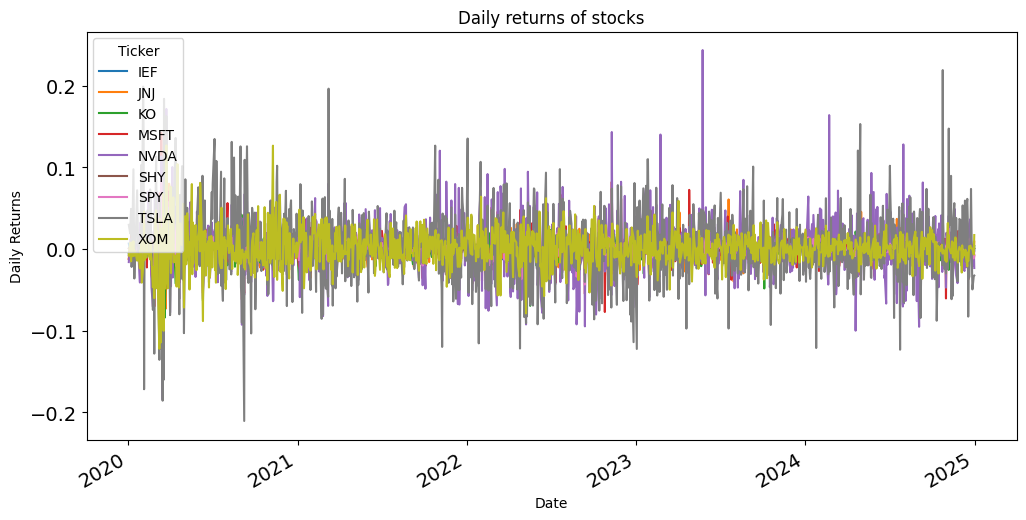

In [8]:
returns.plot(figsize=(12,6), fontsize=(14))
plt.title("Daily returns of stocks")
plt.ylabel("Daily Returns")
plt.show()

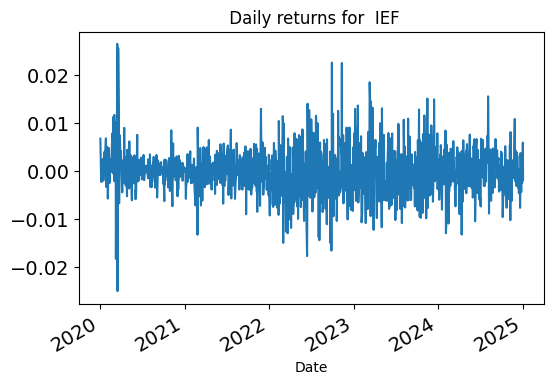

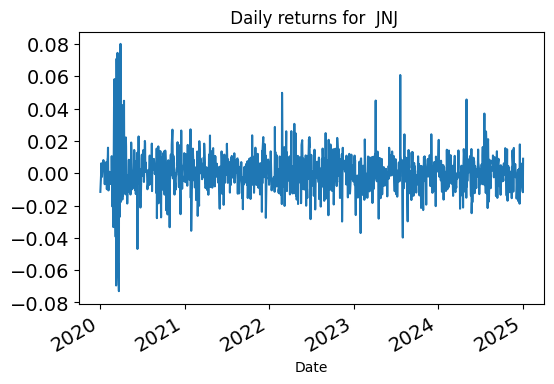

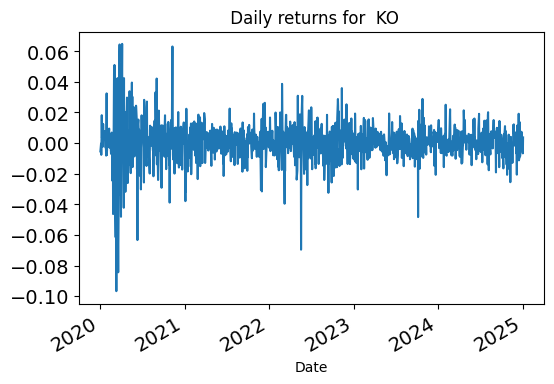

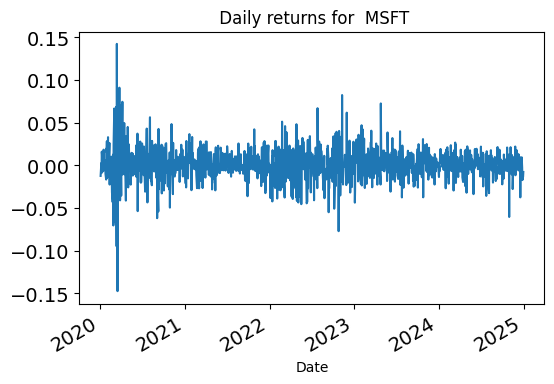

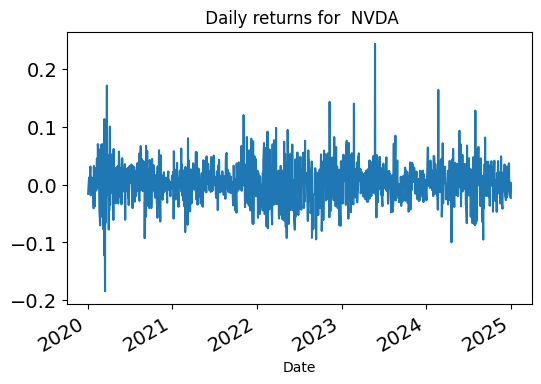

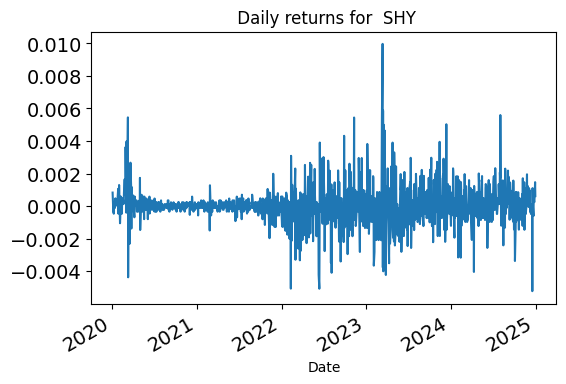

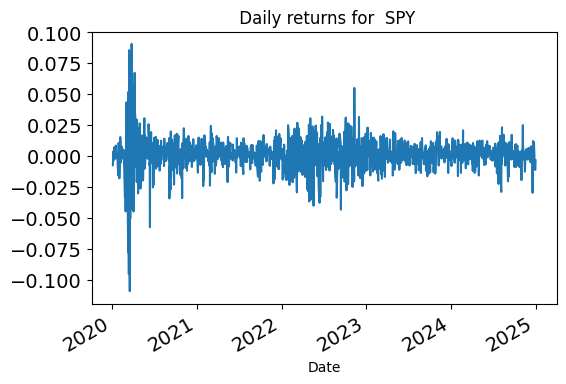

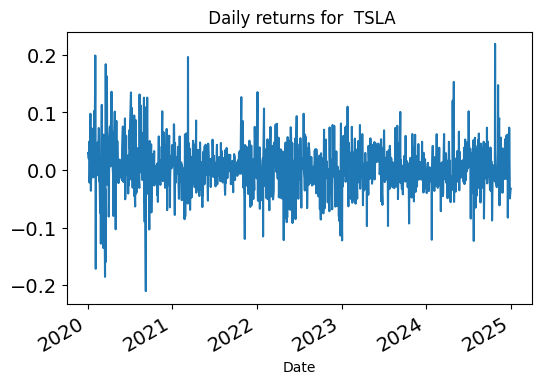

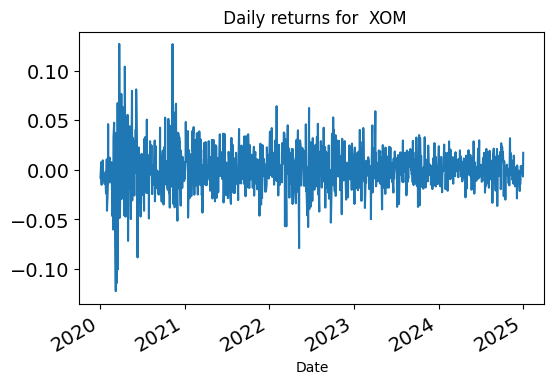

In [9]:
for ticker in returns.columns:
    returns[ticker].plot(figsize=(6,4), fontsize=(14), title=f" Daily returns for  {ticker}")
    plt.show()

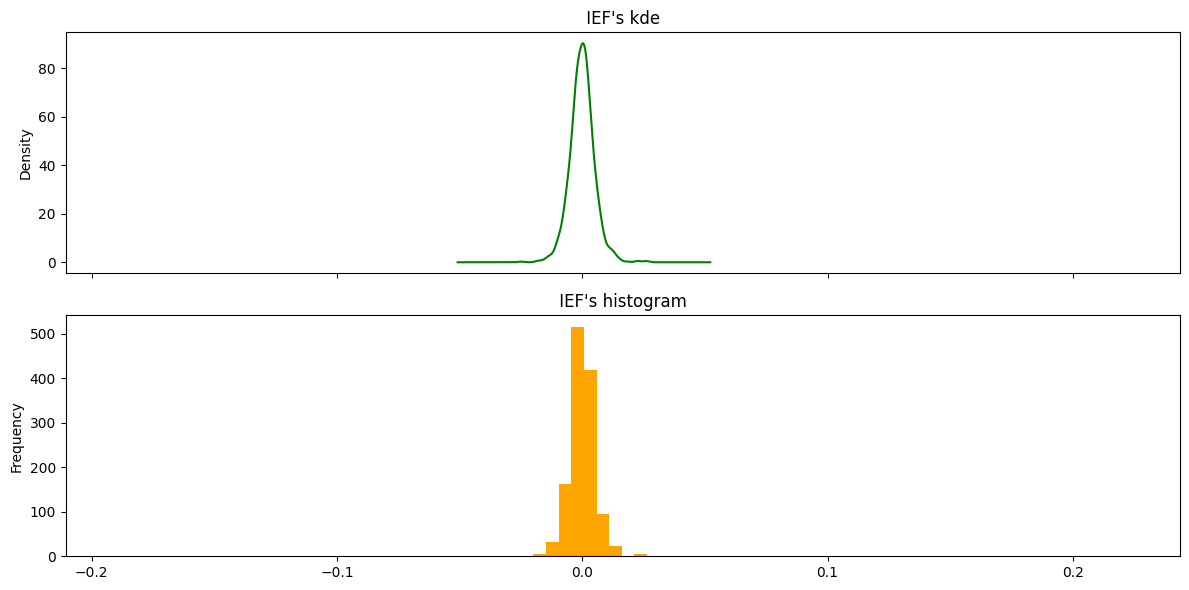

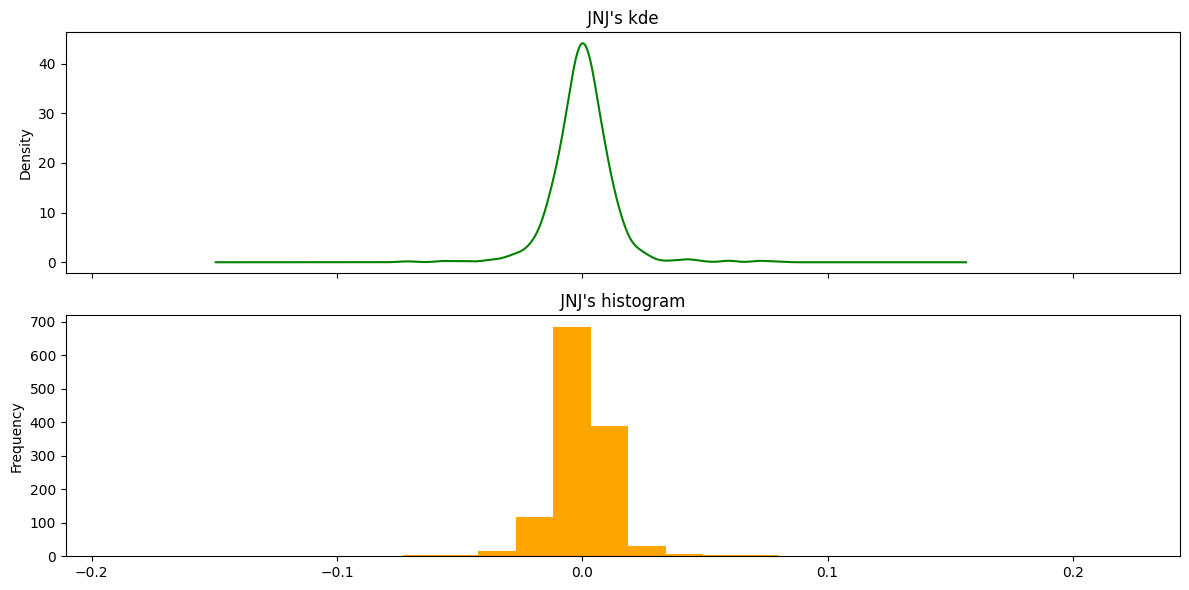

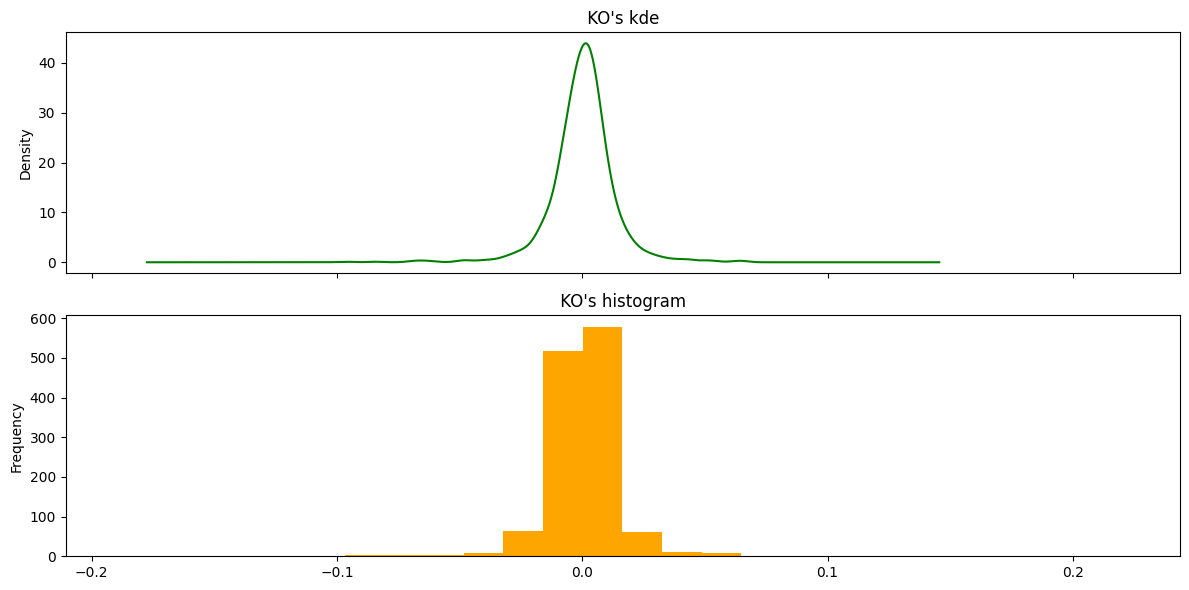

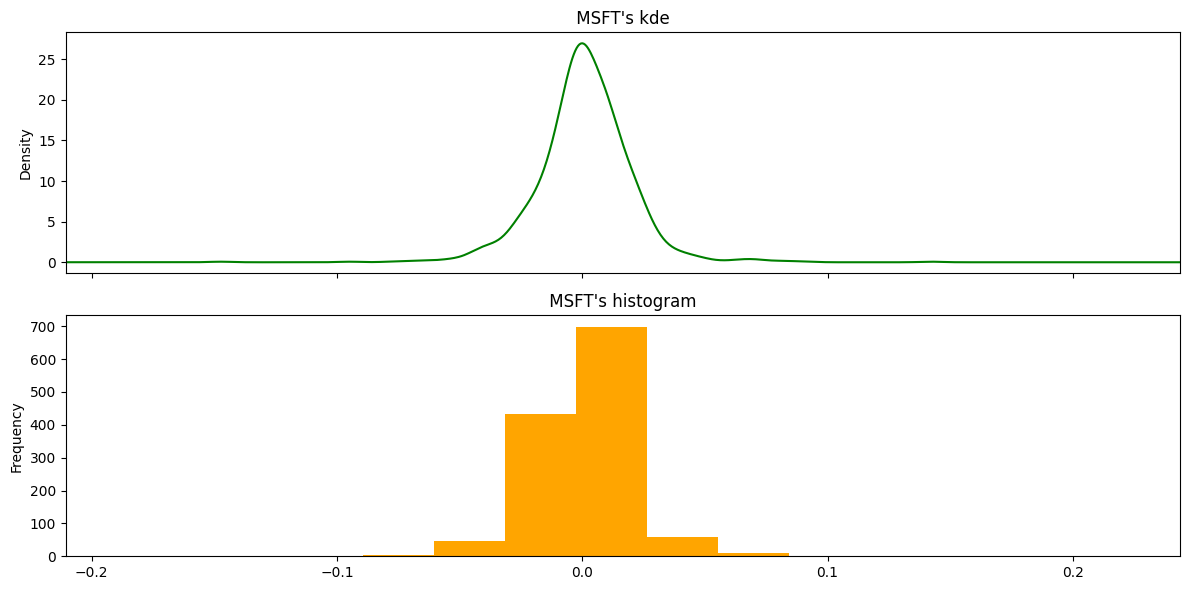

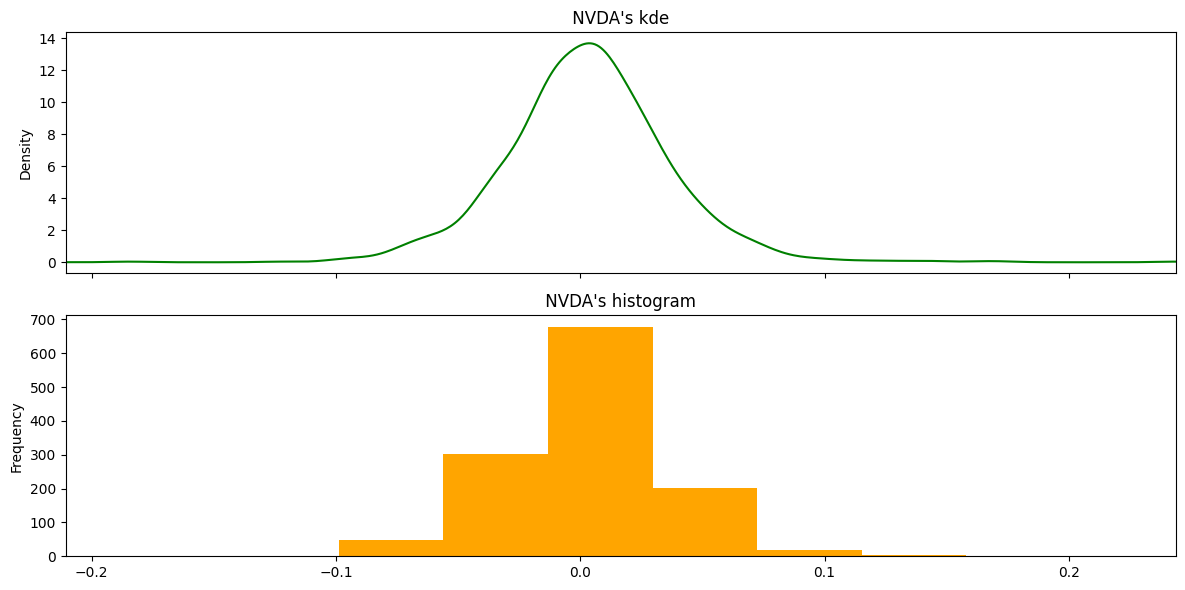

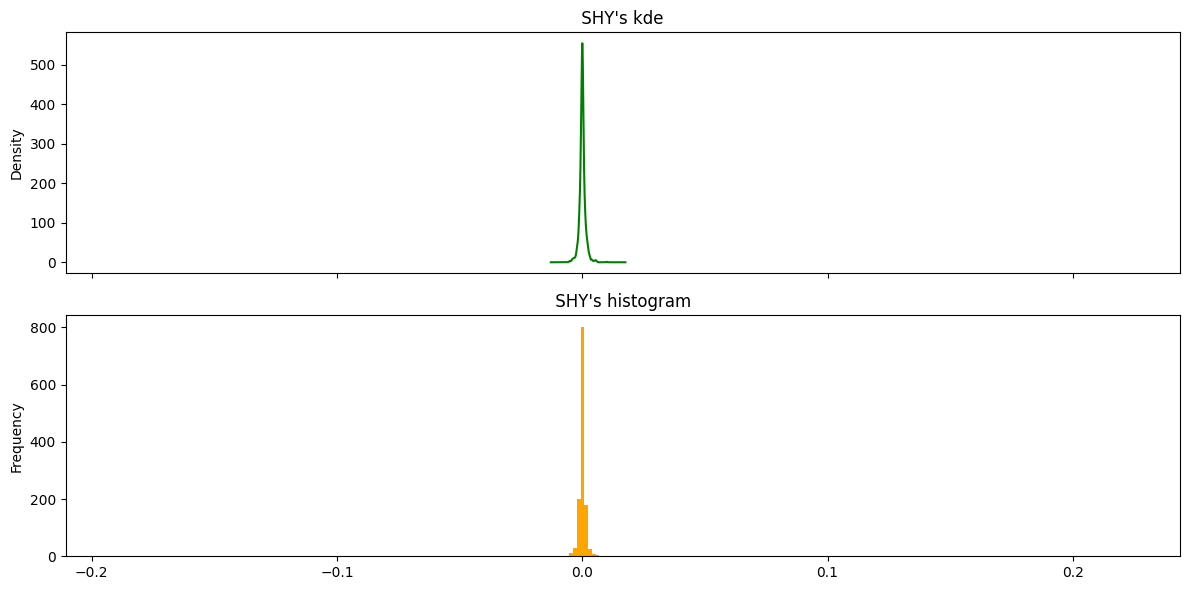

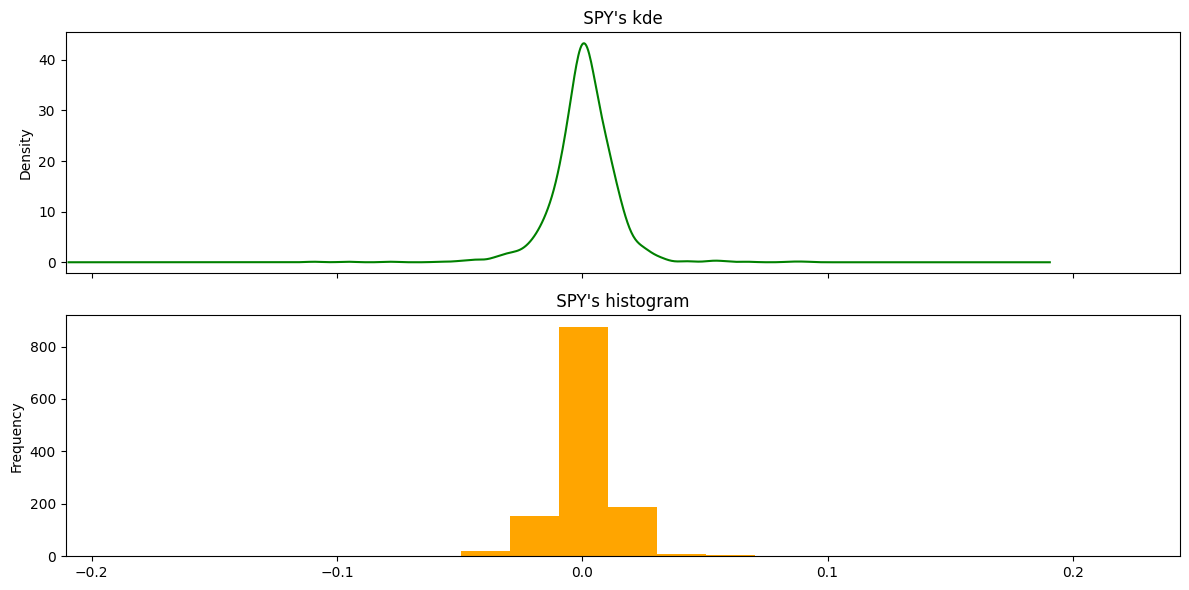

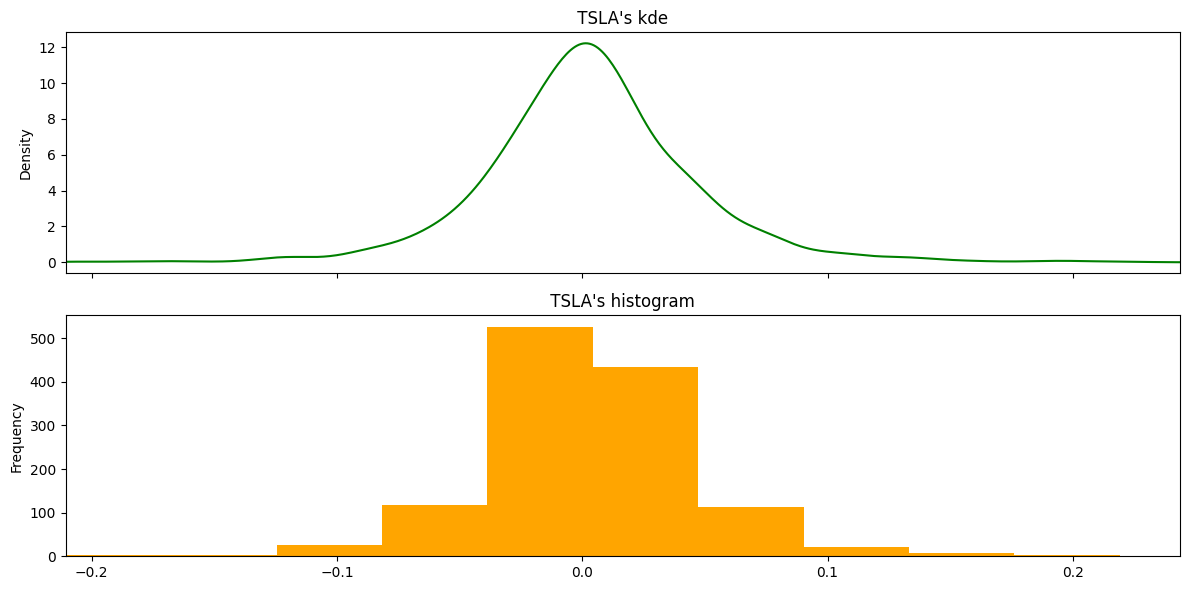

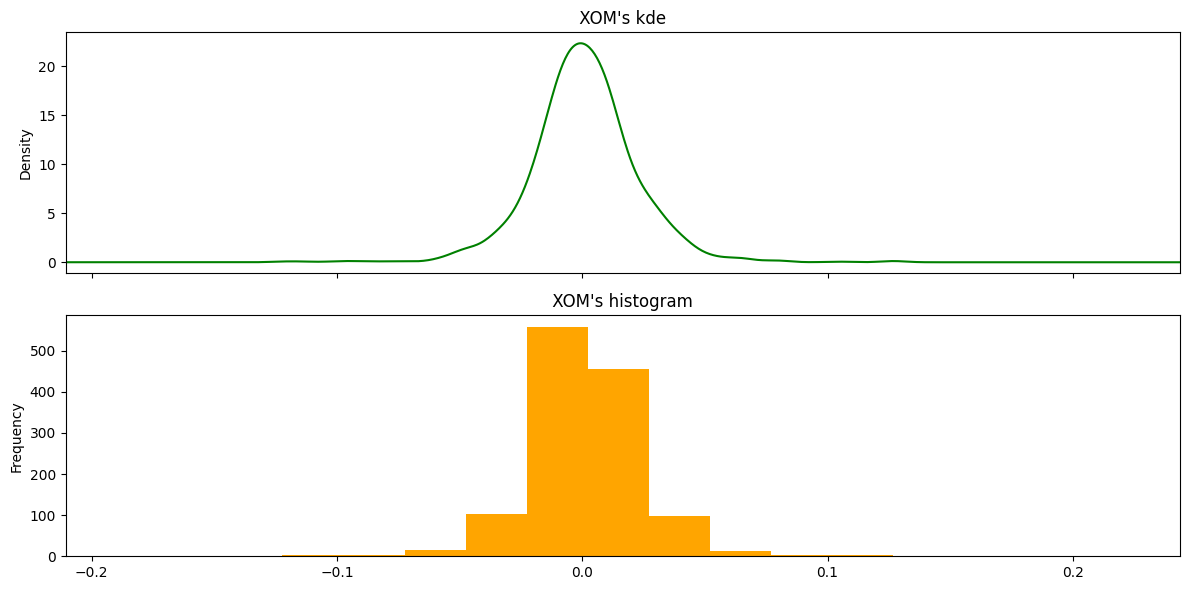

In [10]:
import seaborn as sns

x_min = returns.min().min()
x_max = returns.max().max()

for ticker in returns.columns:
    fig, axes = plt.subplots(2, 1, figsize=(12,6), sharex=True)

    returns[ticker].plot(kind='kde', ax=axes[0], title=f" {ticker}'s kde ", color='green')
    axes[0].set_xlim(x_min, x_max)  # fix the axis limit, for easily comparable results

    returns[ticker].plot(kind='hist', ax=axes[1], title=f" {ticker}'s histogram ", color='orange')
    axes[1].set_xlim(x_min, x_max)
    

    plt.tight_layout()
    plt.show()


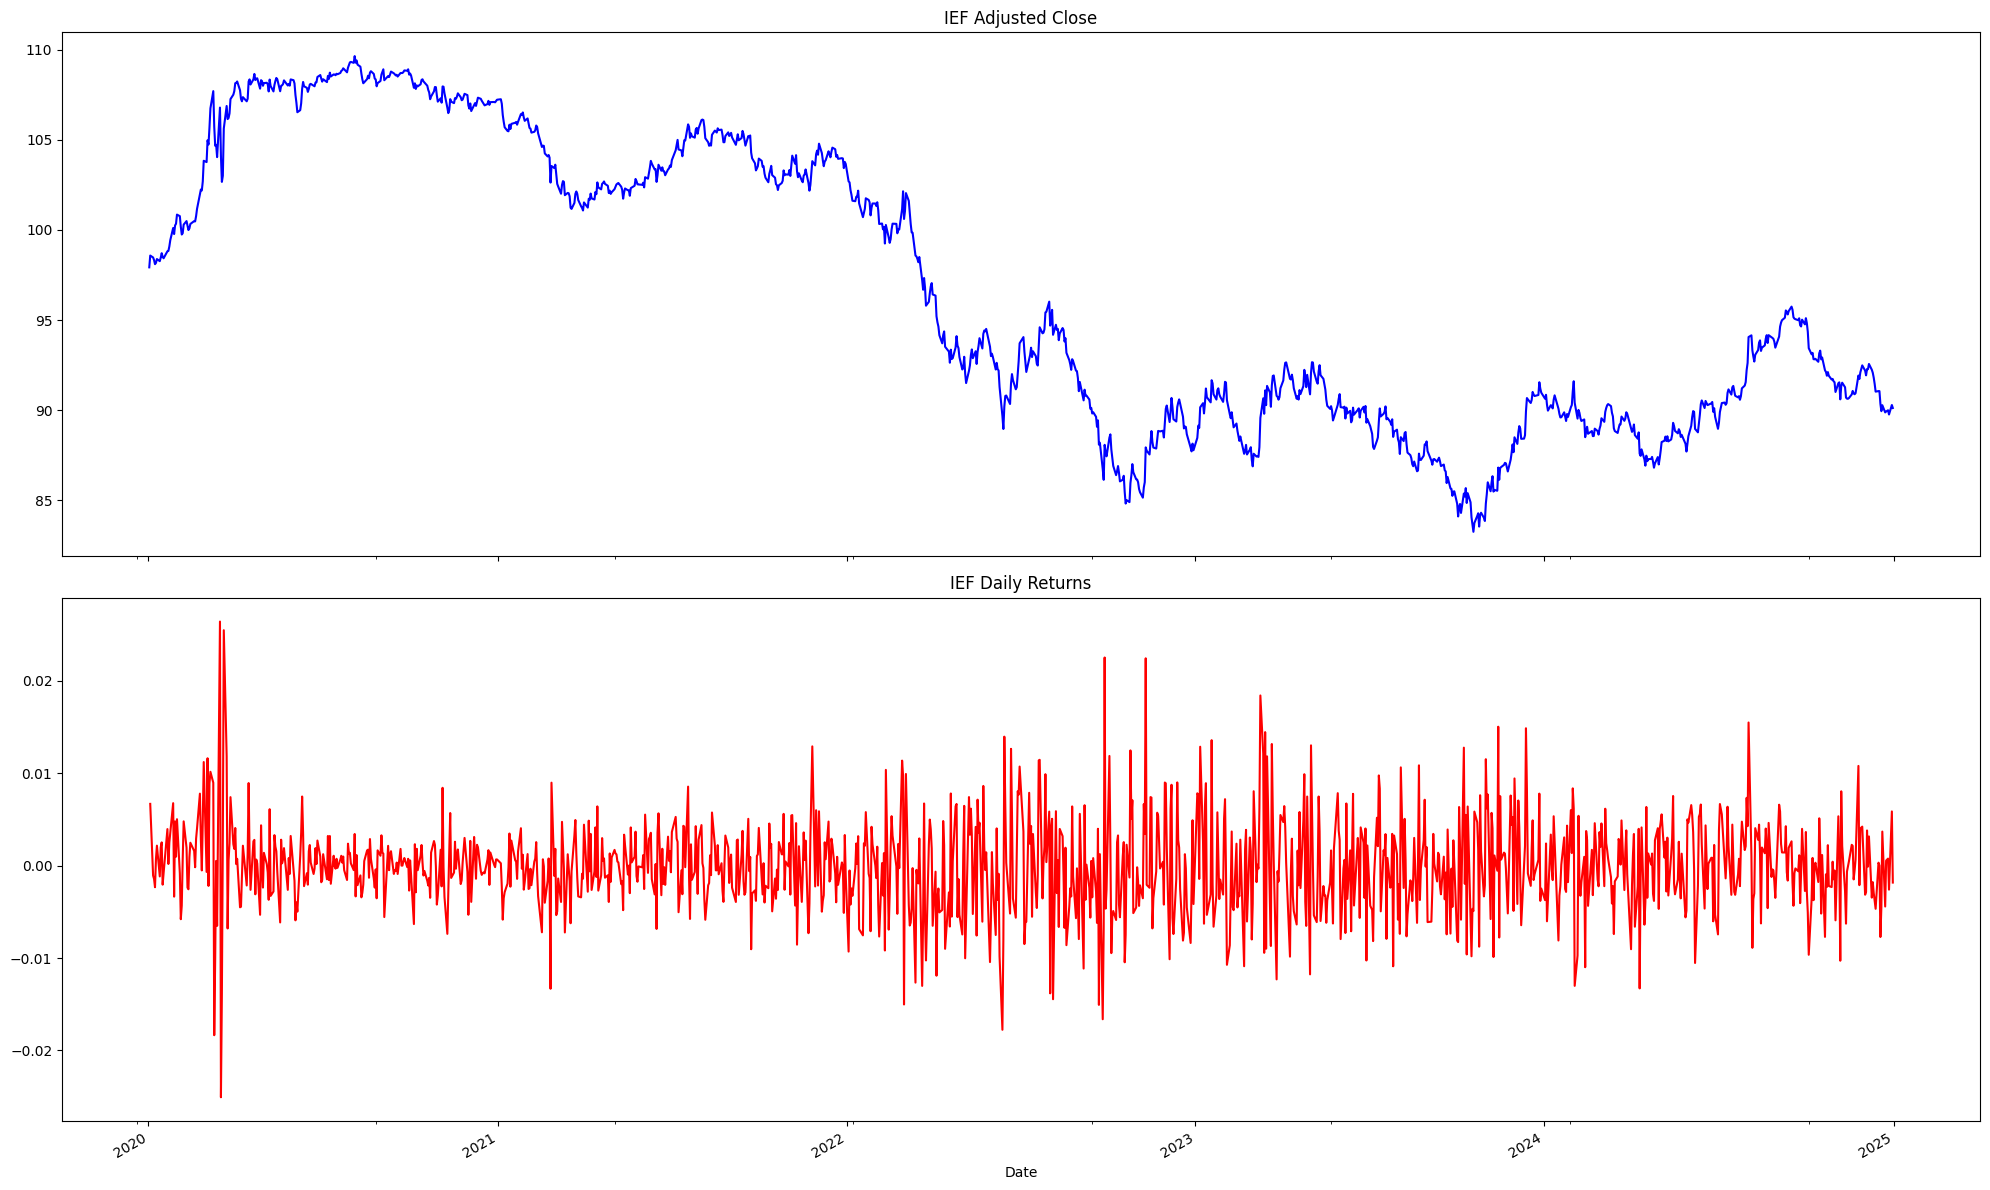

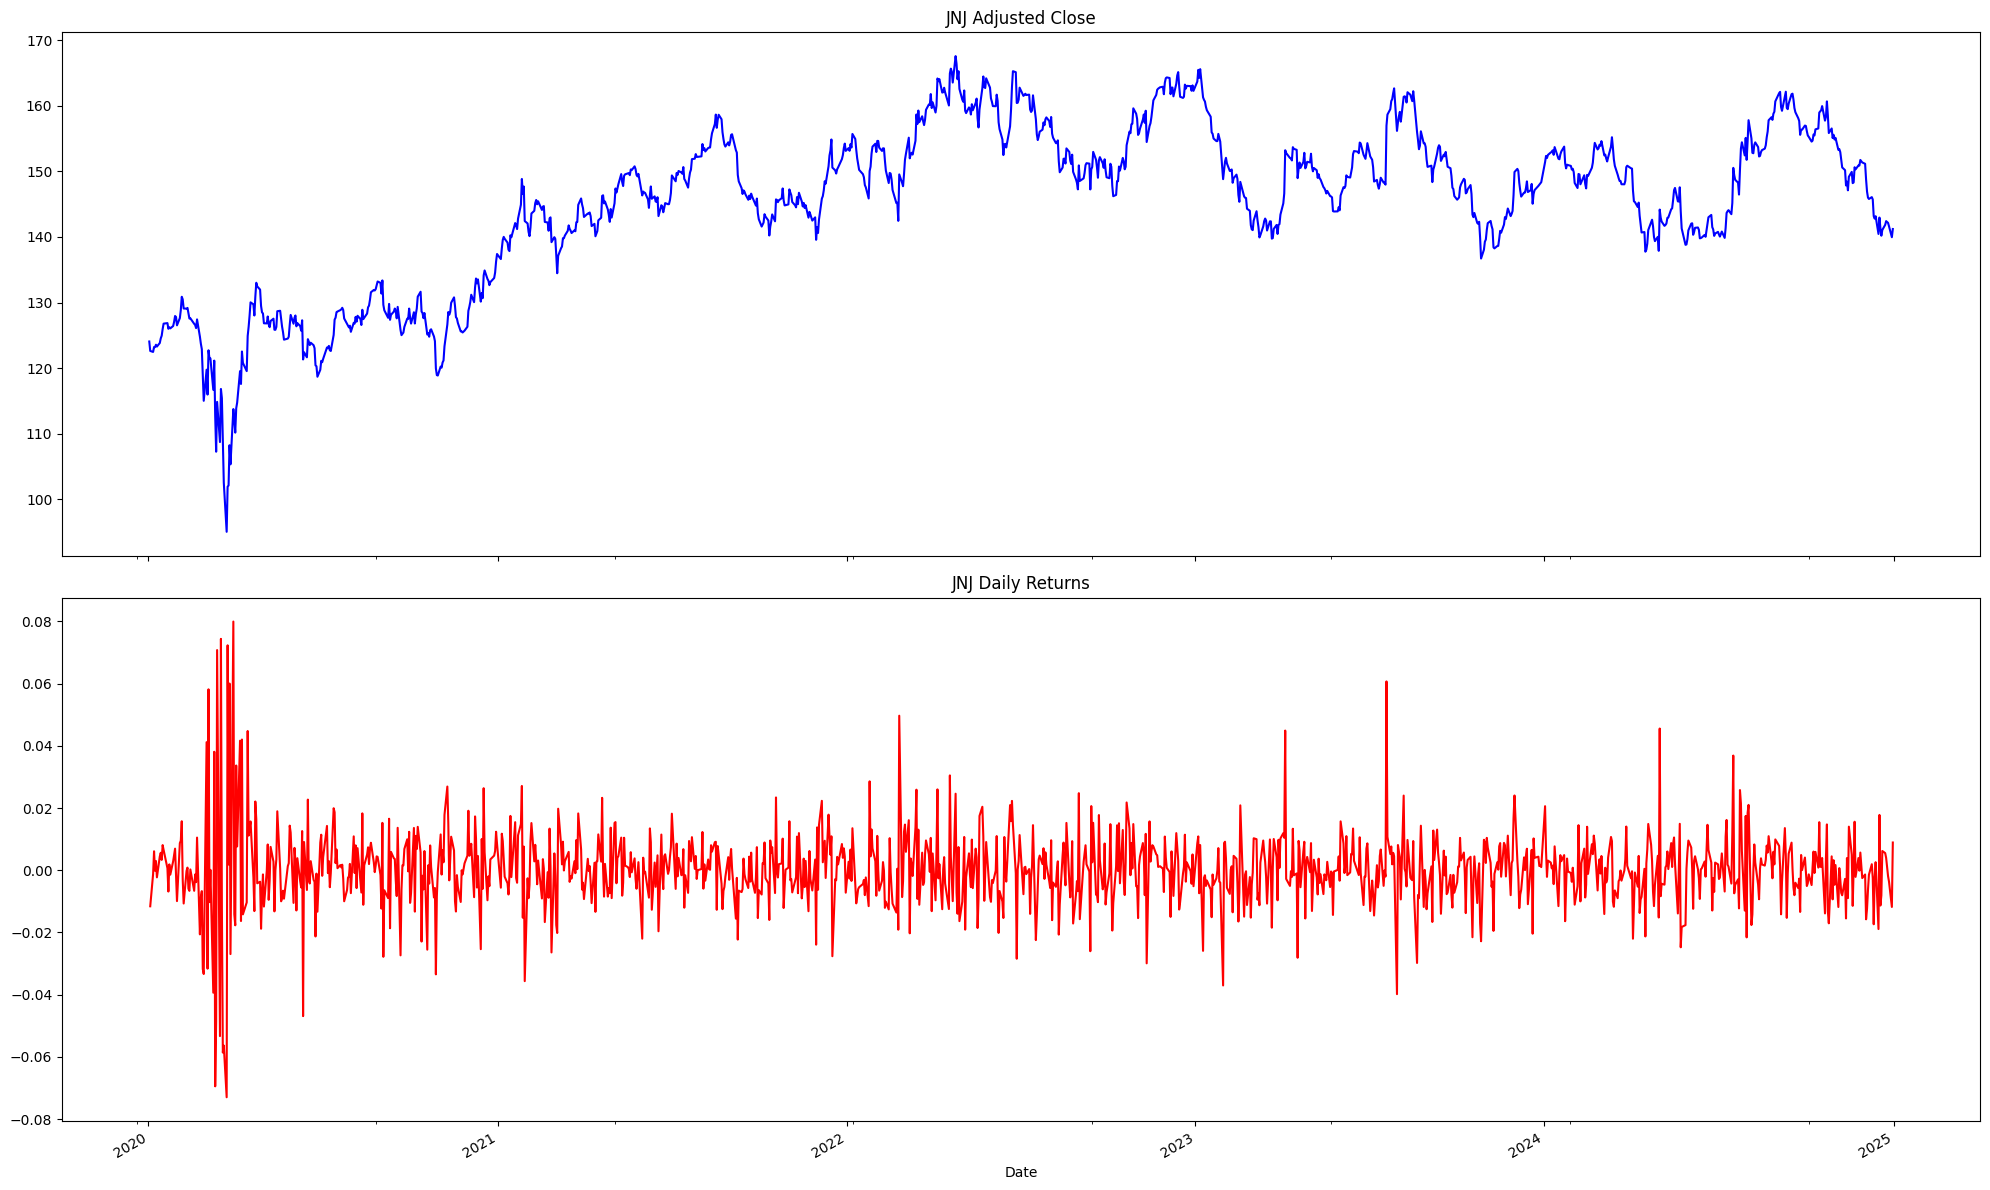

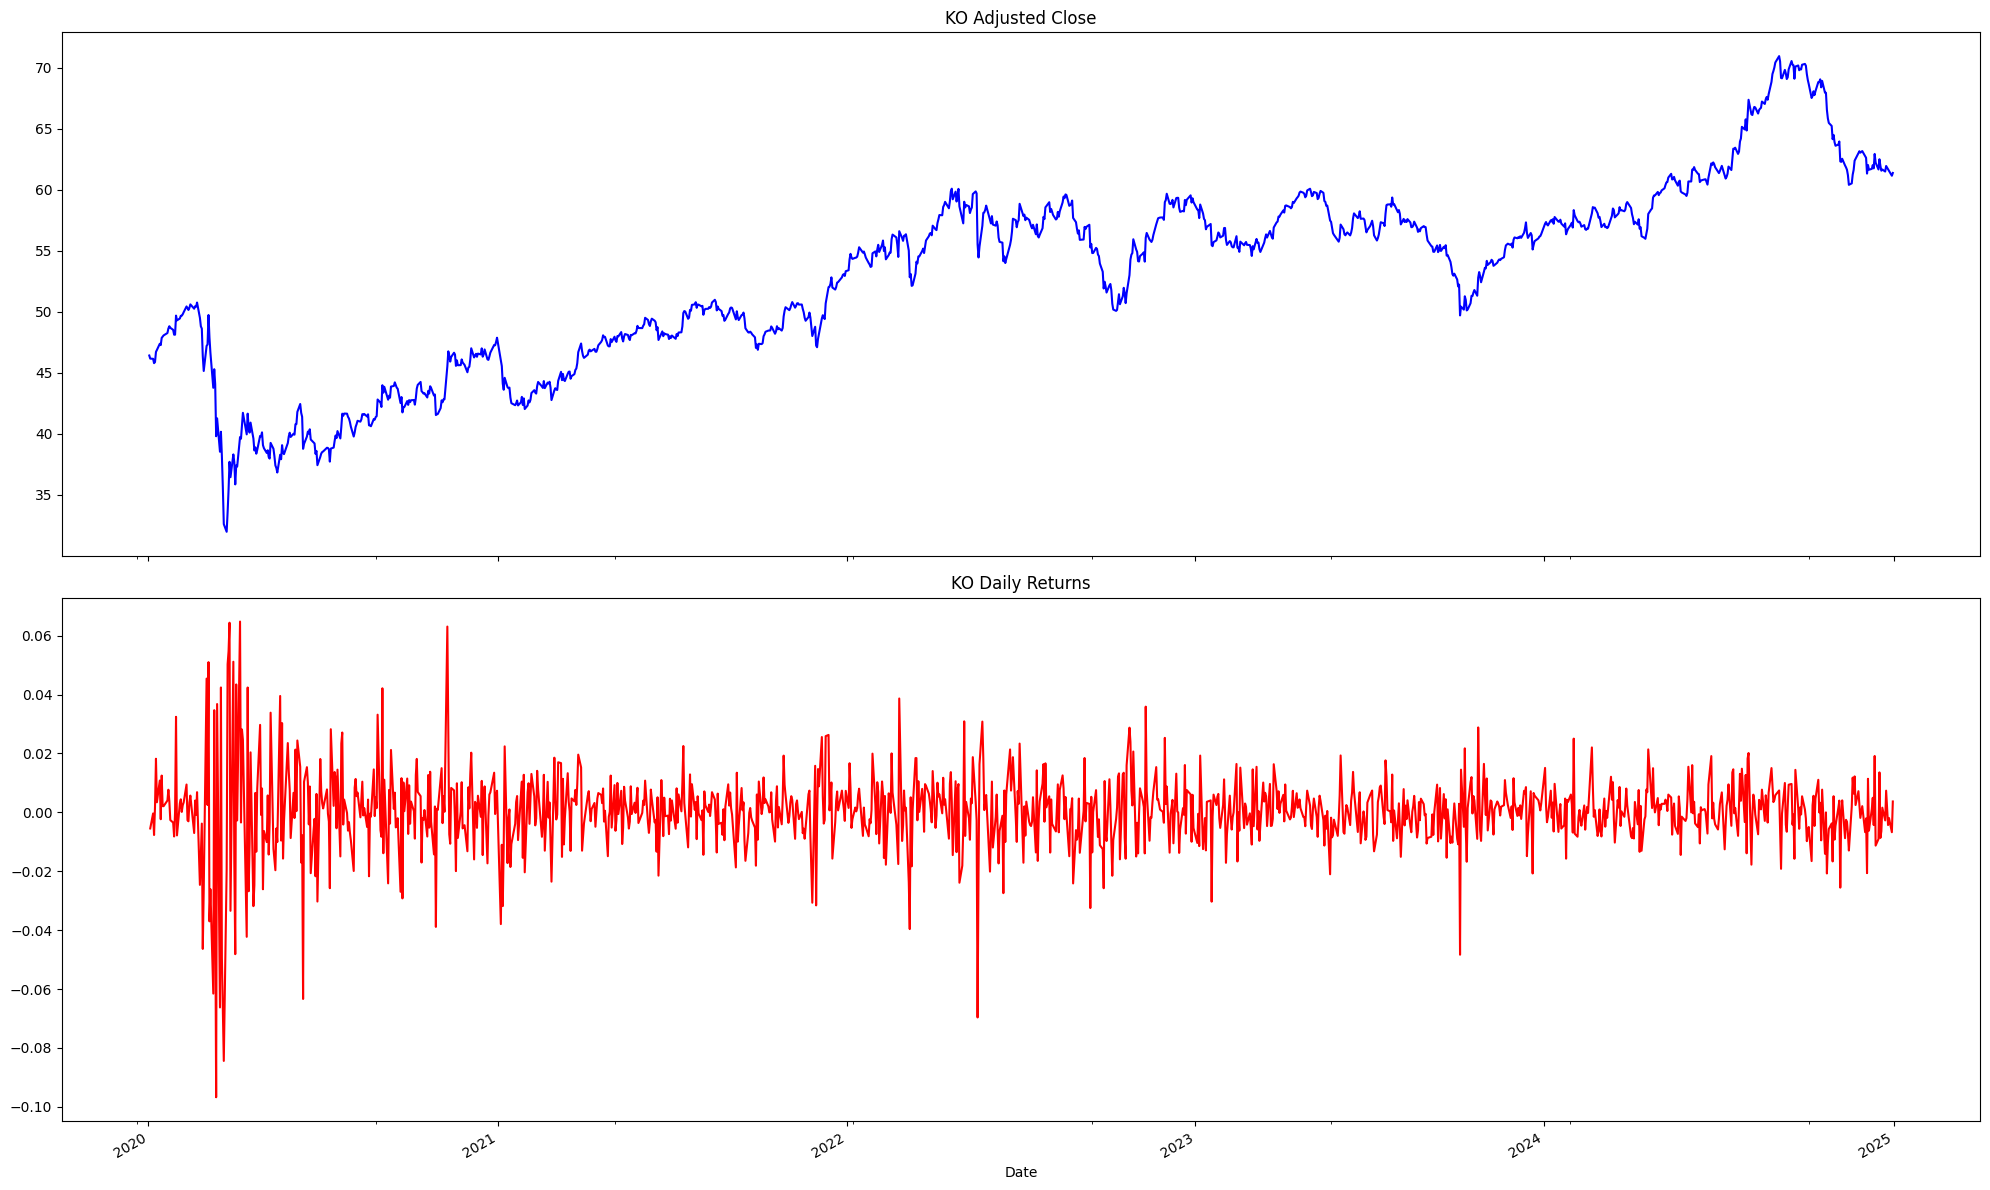

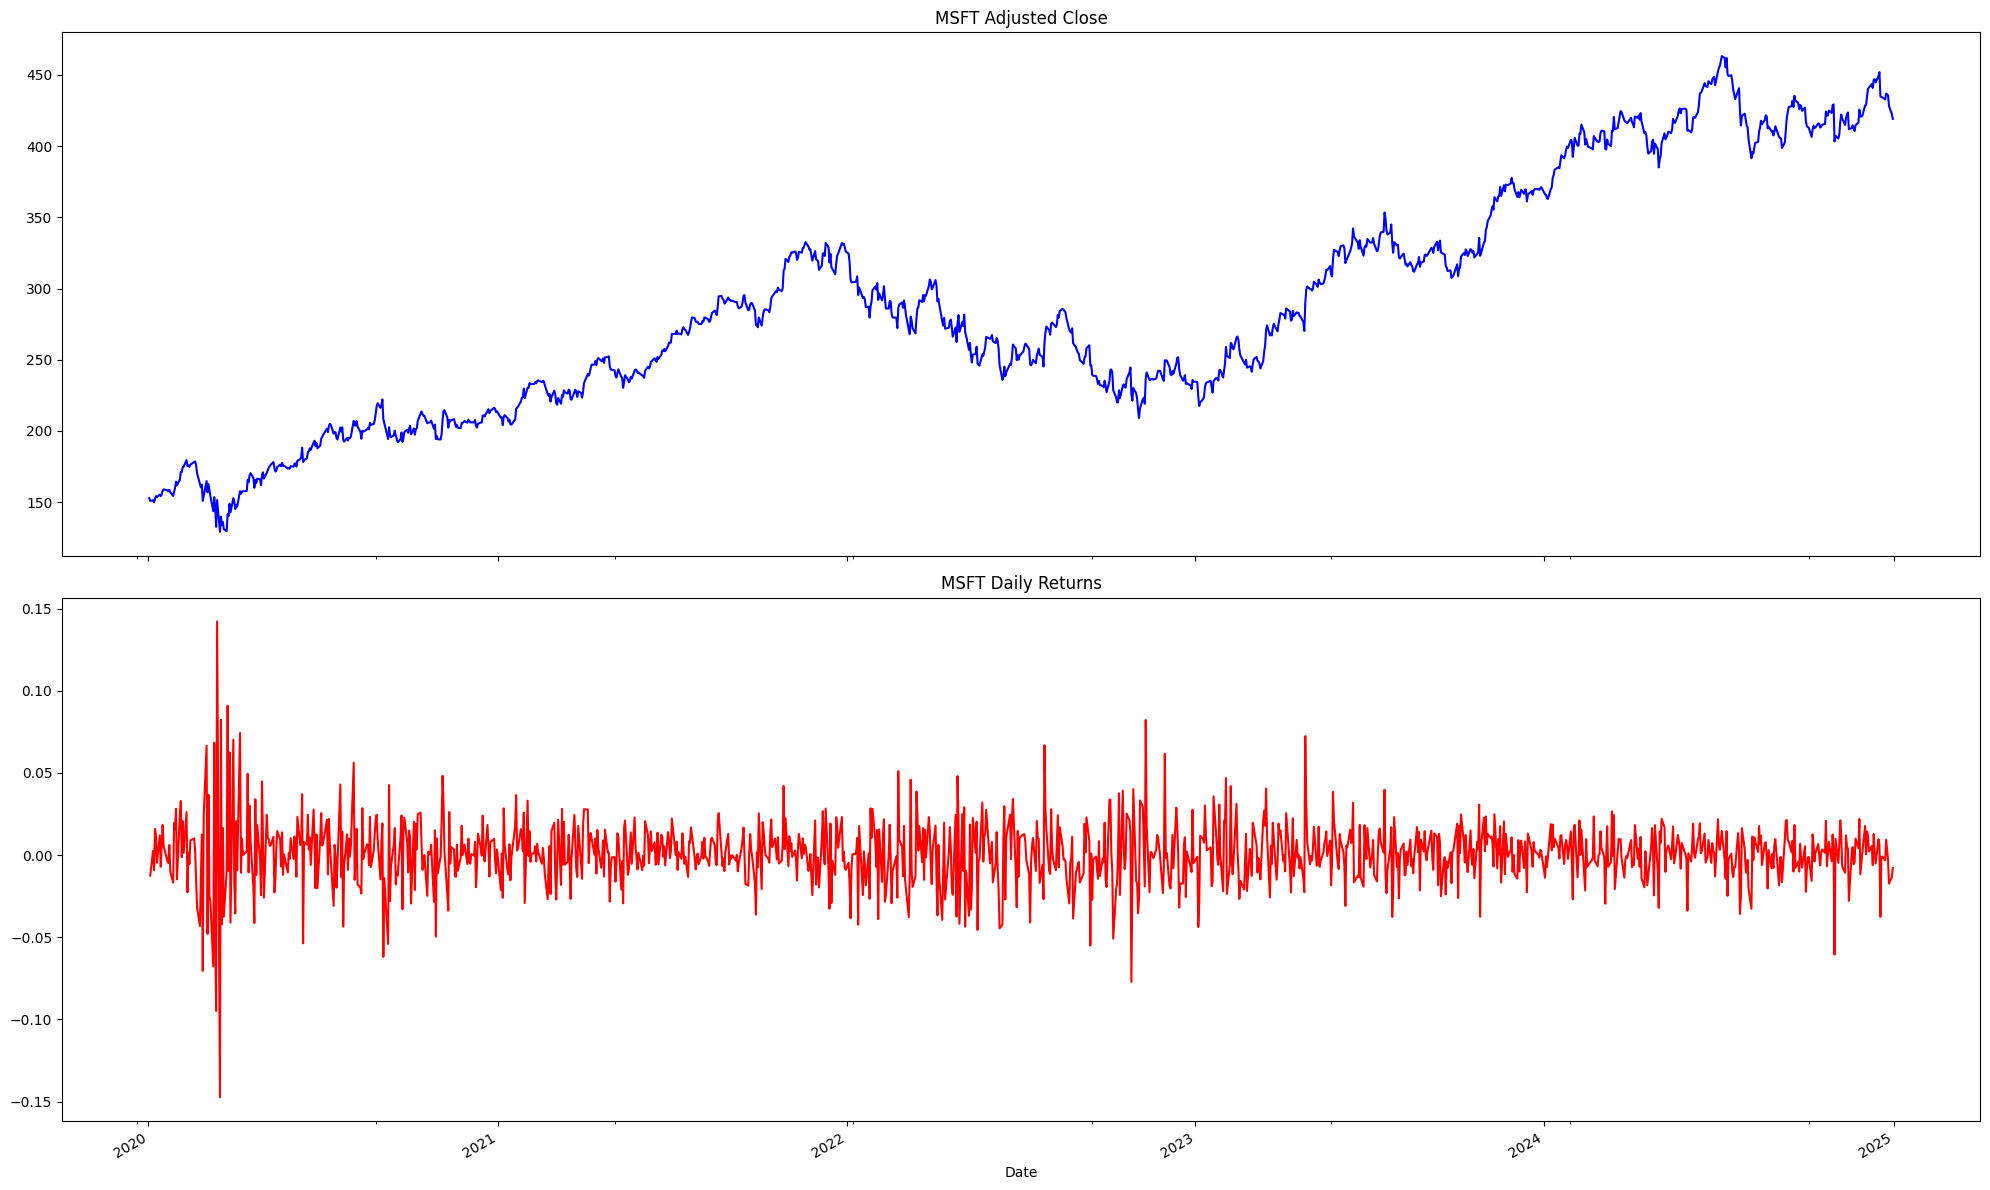

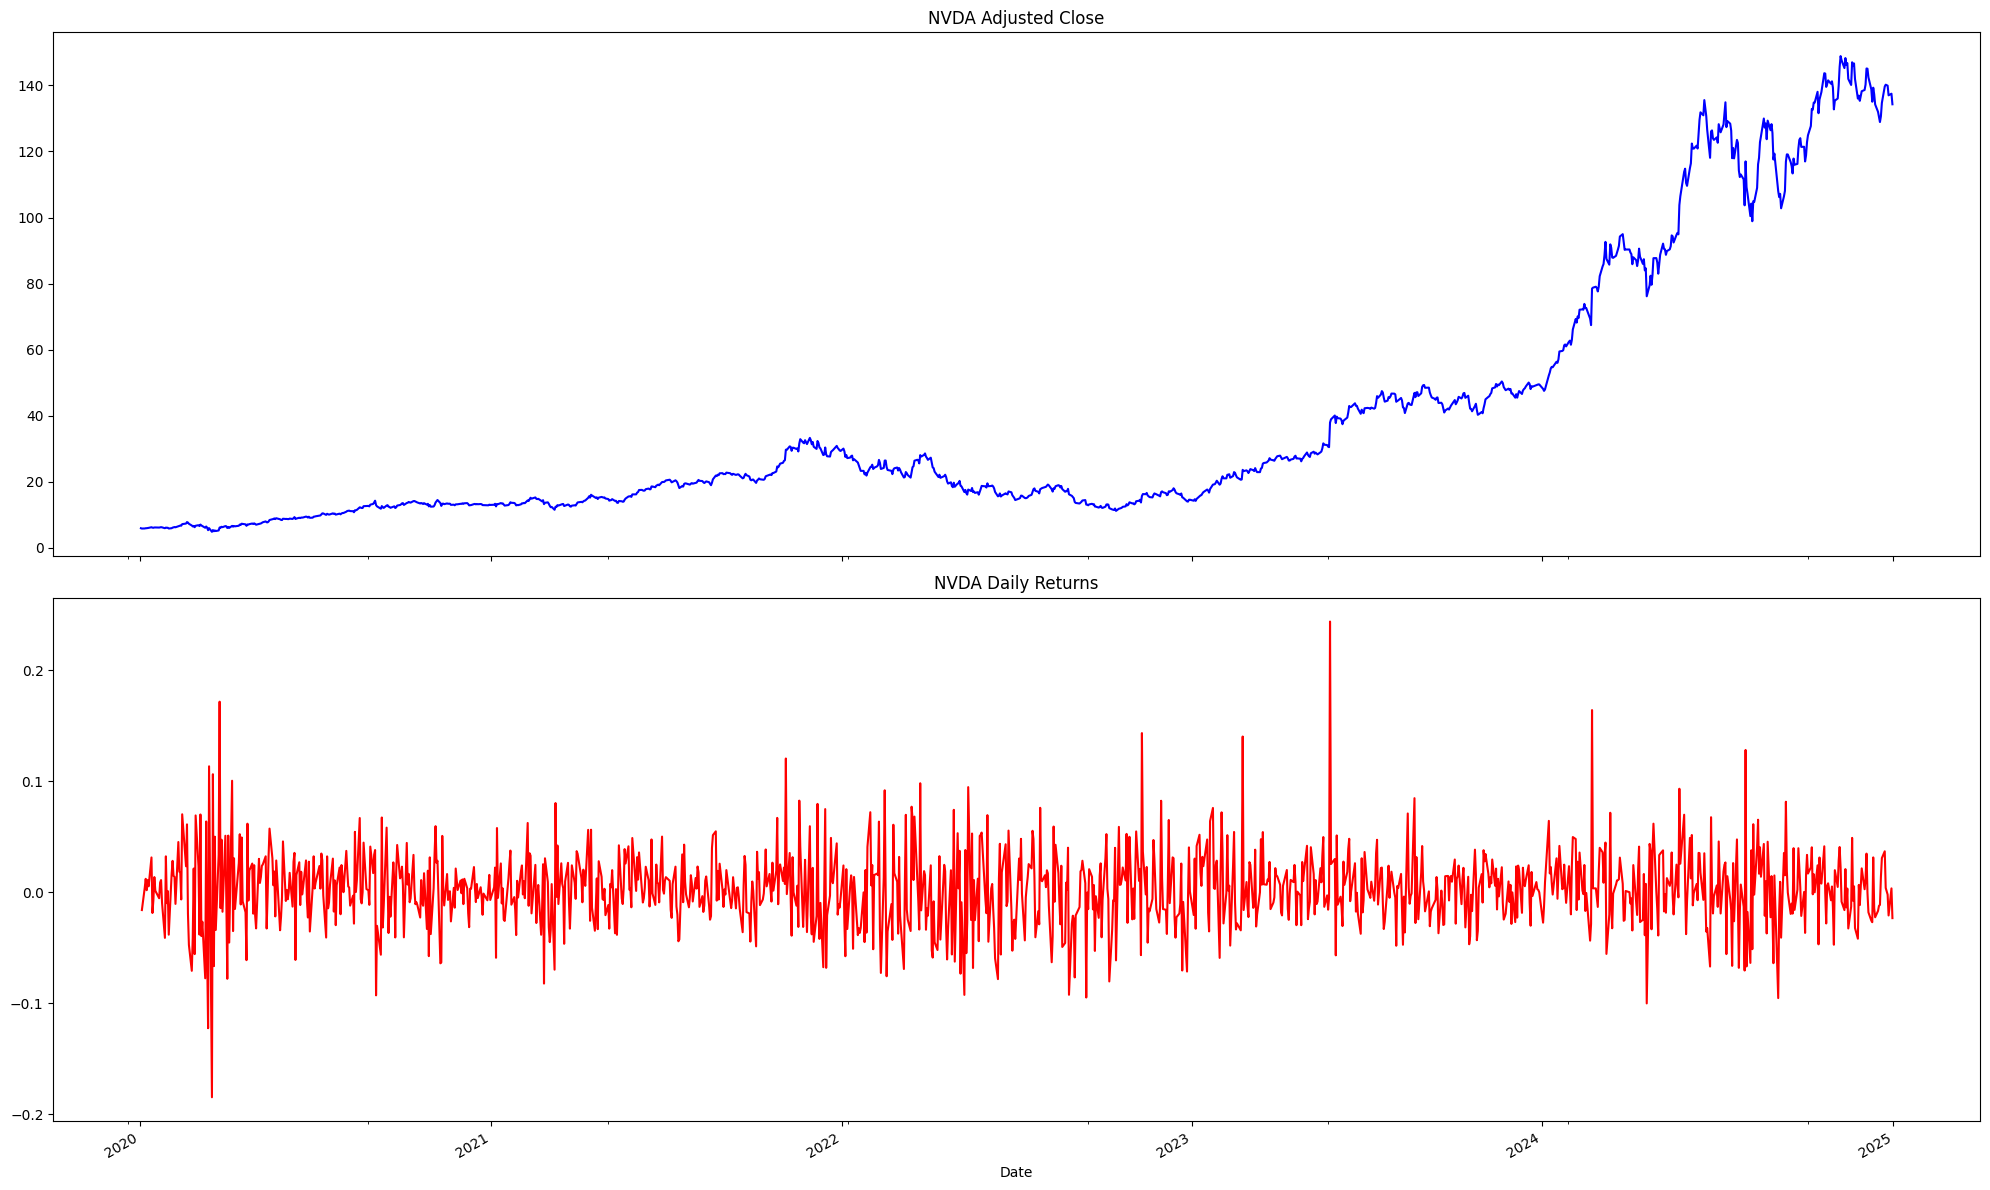

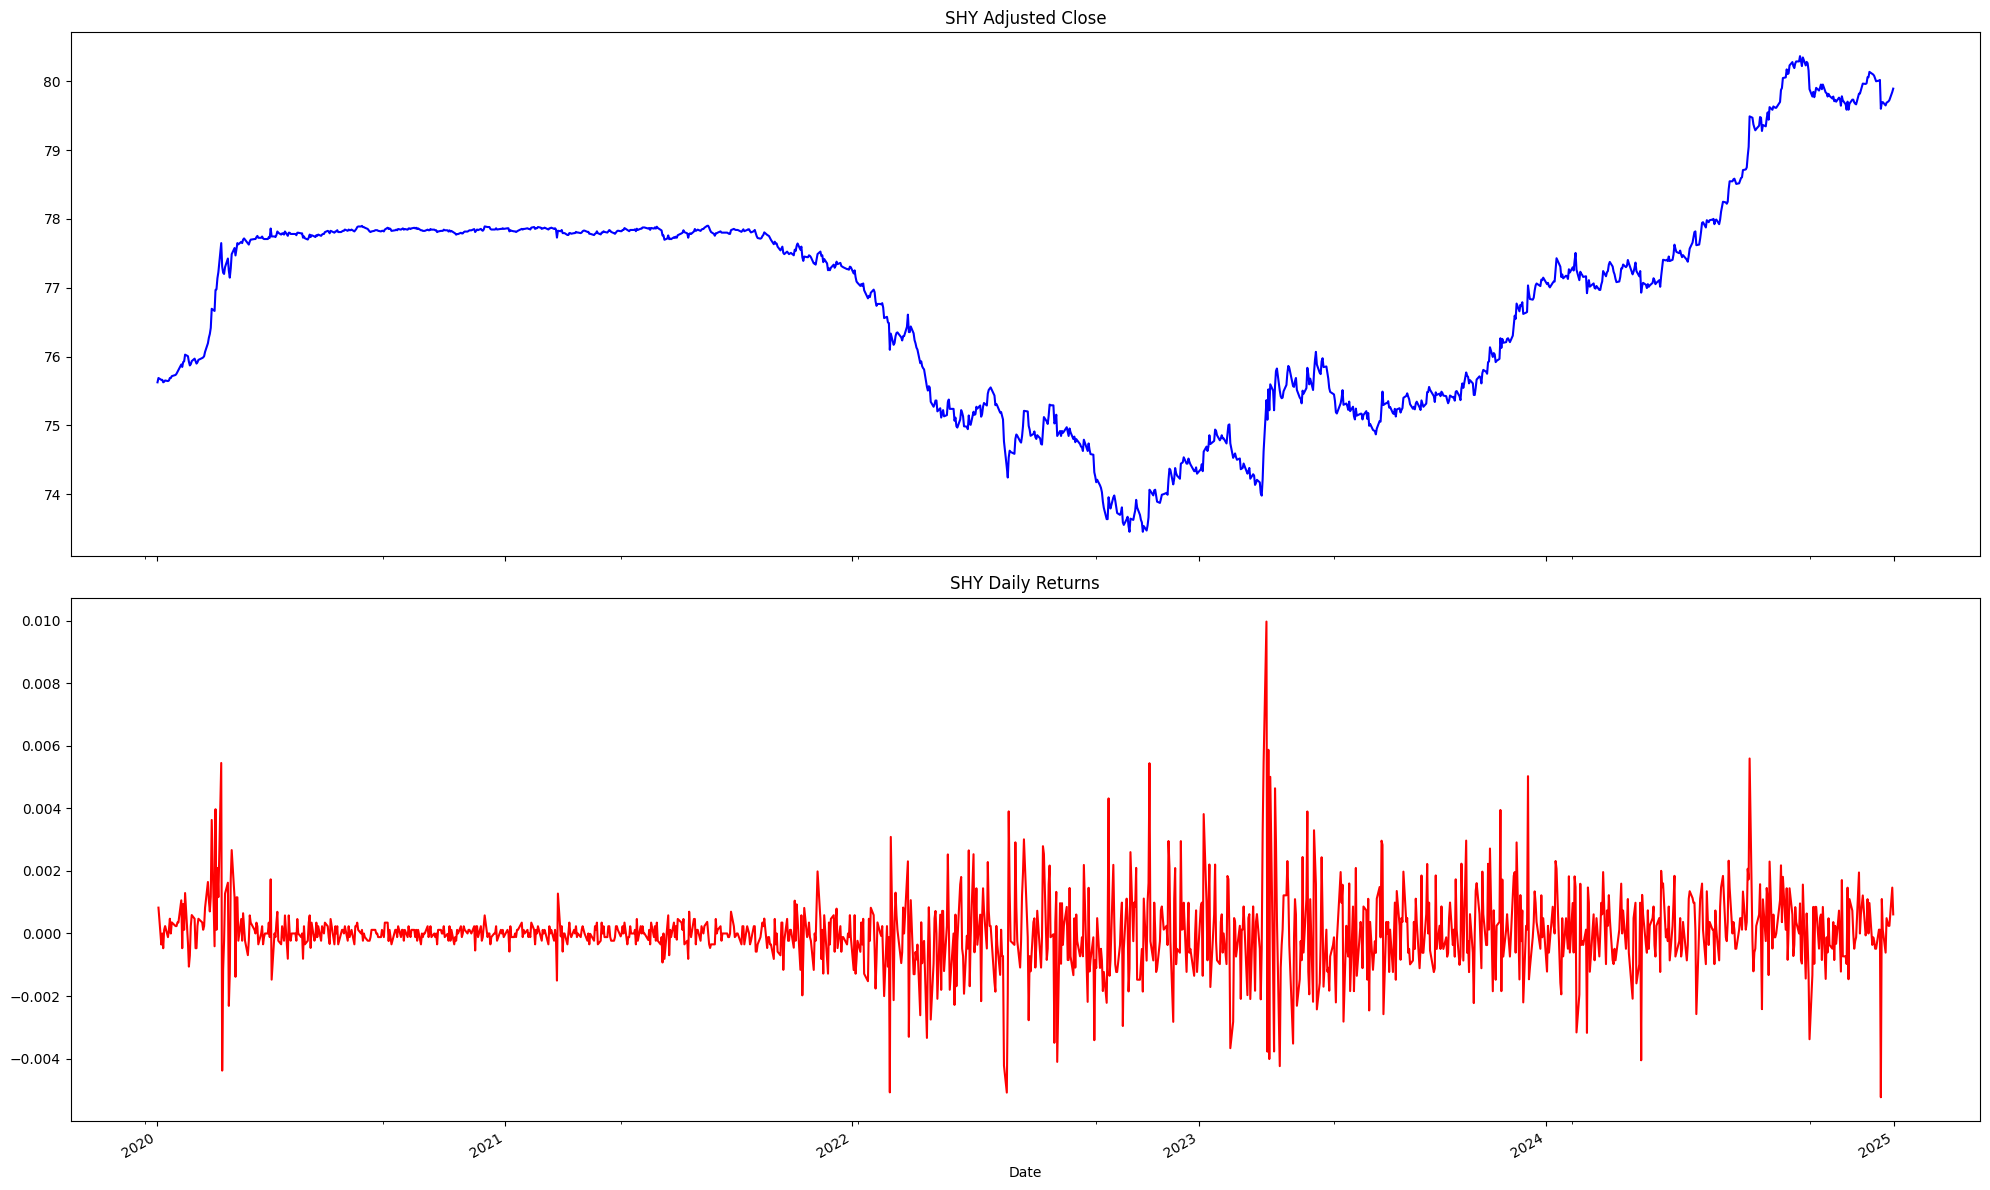

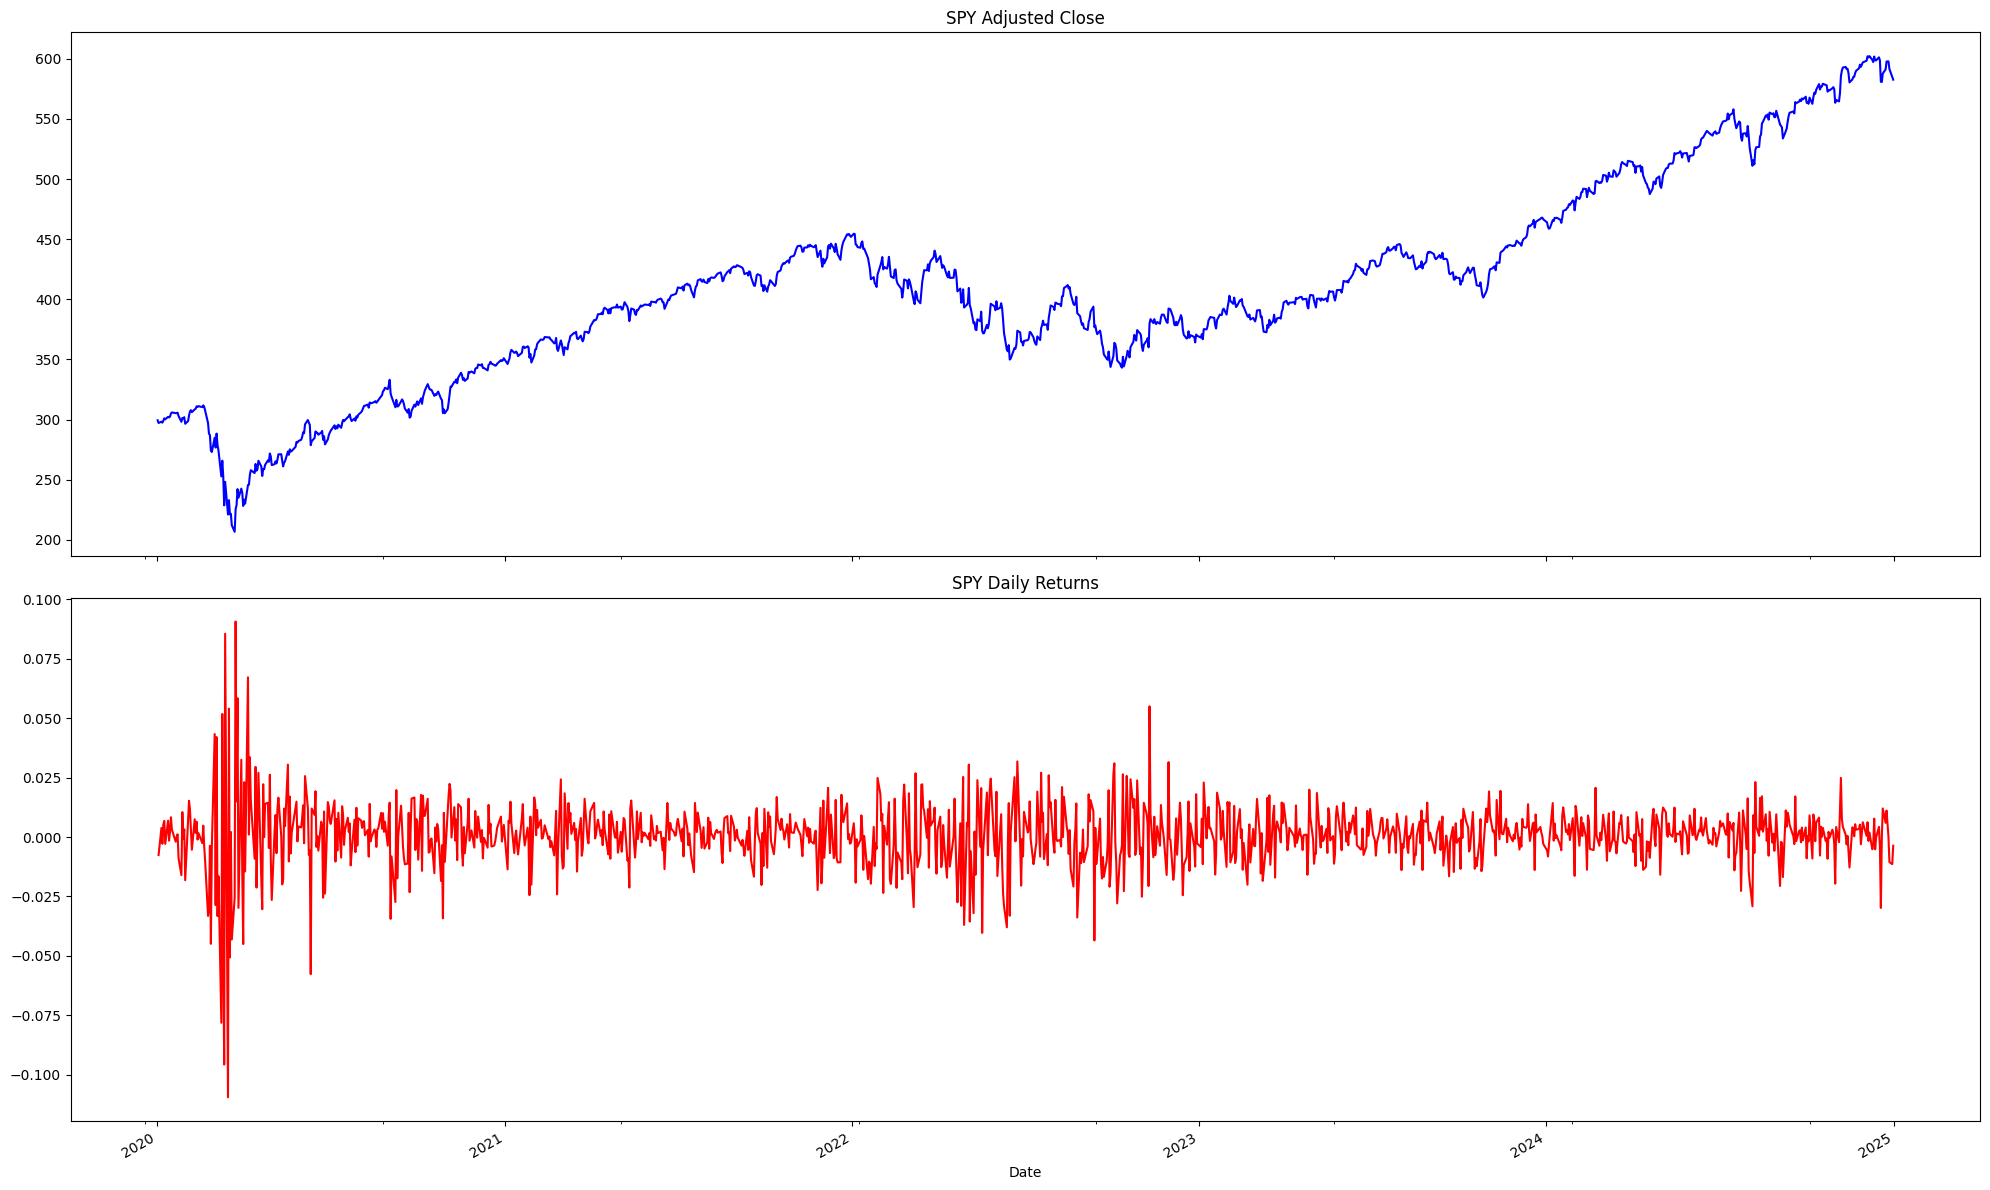

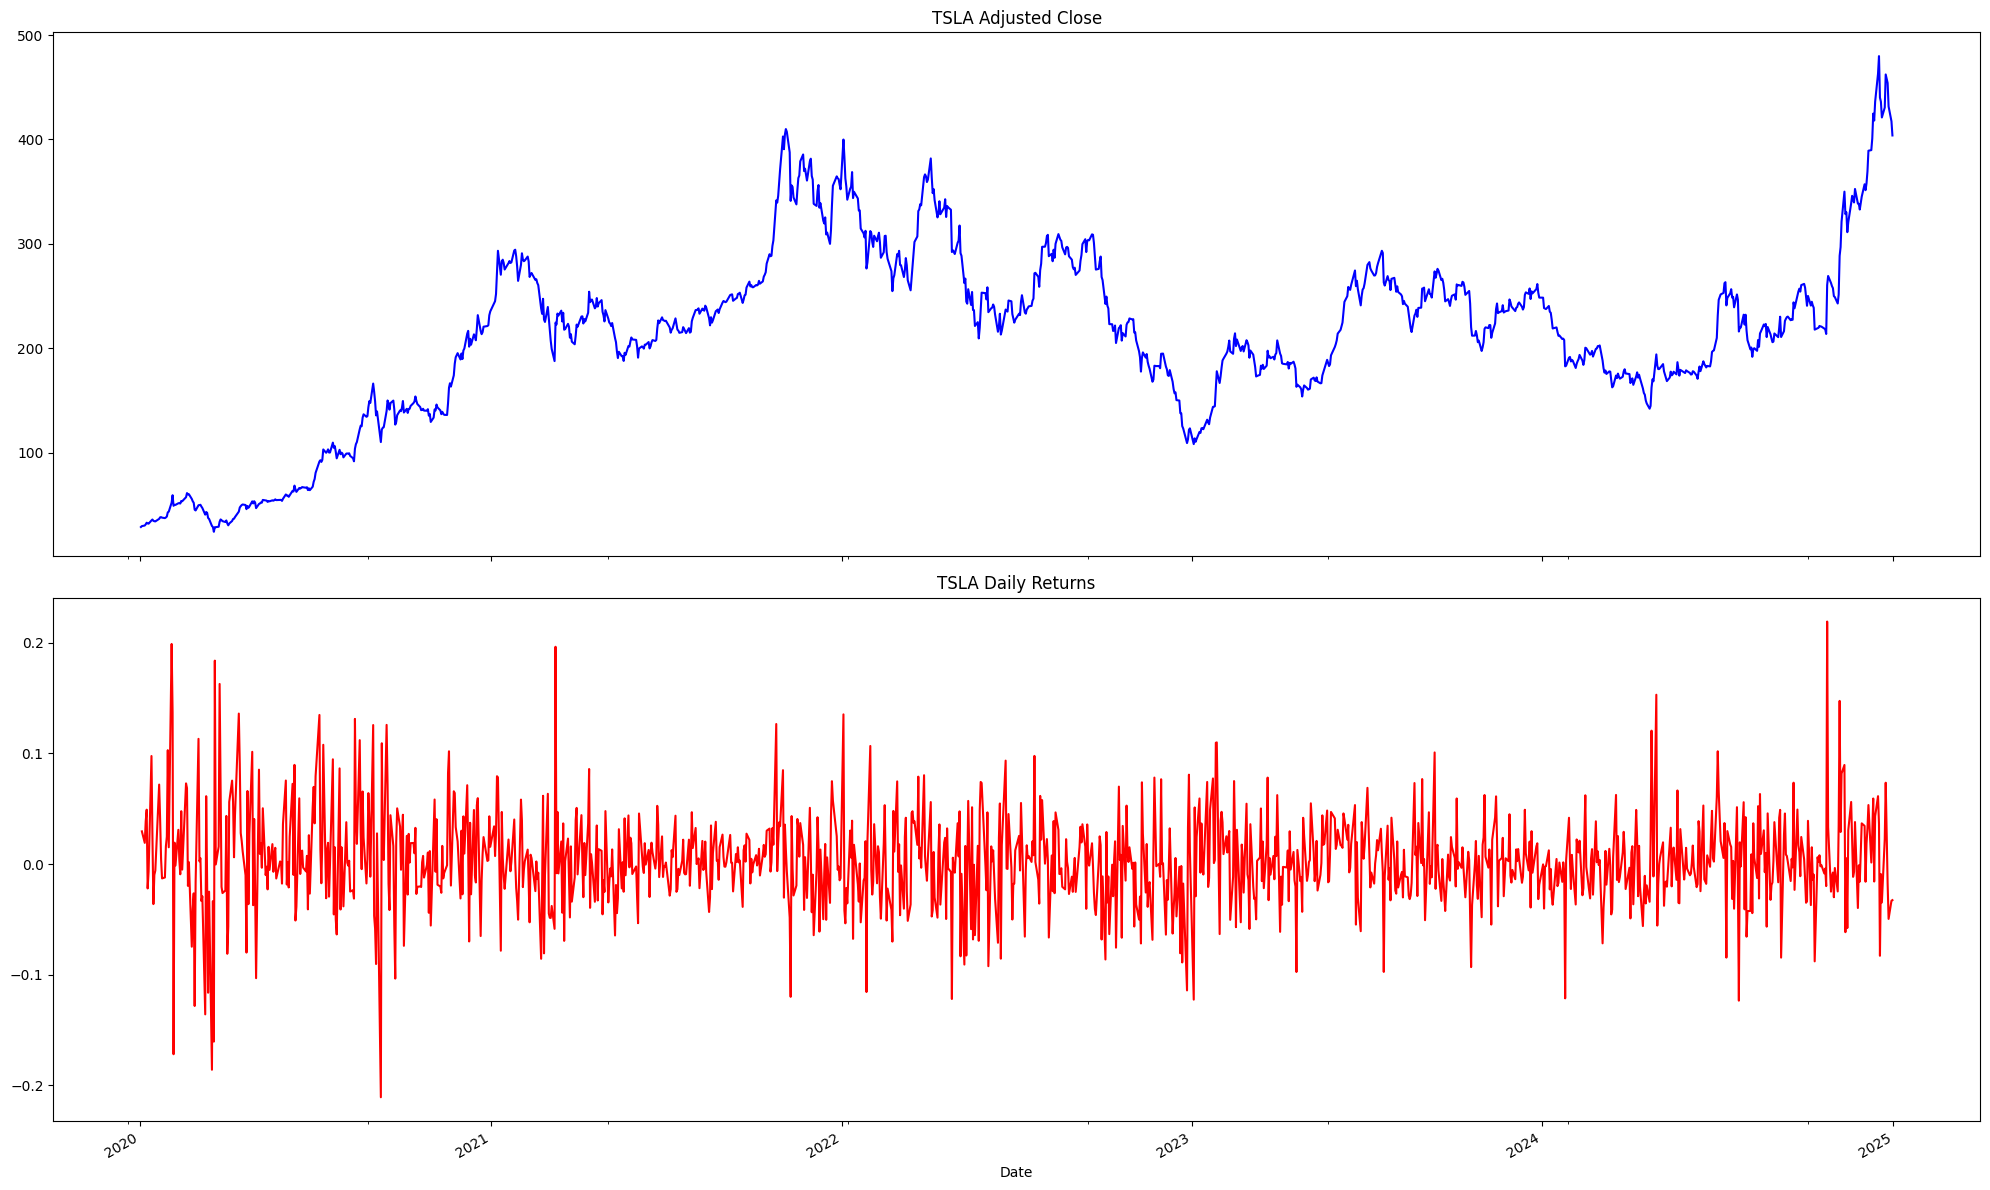

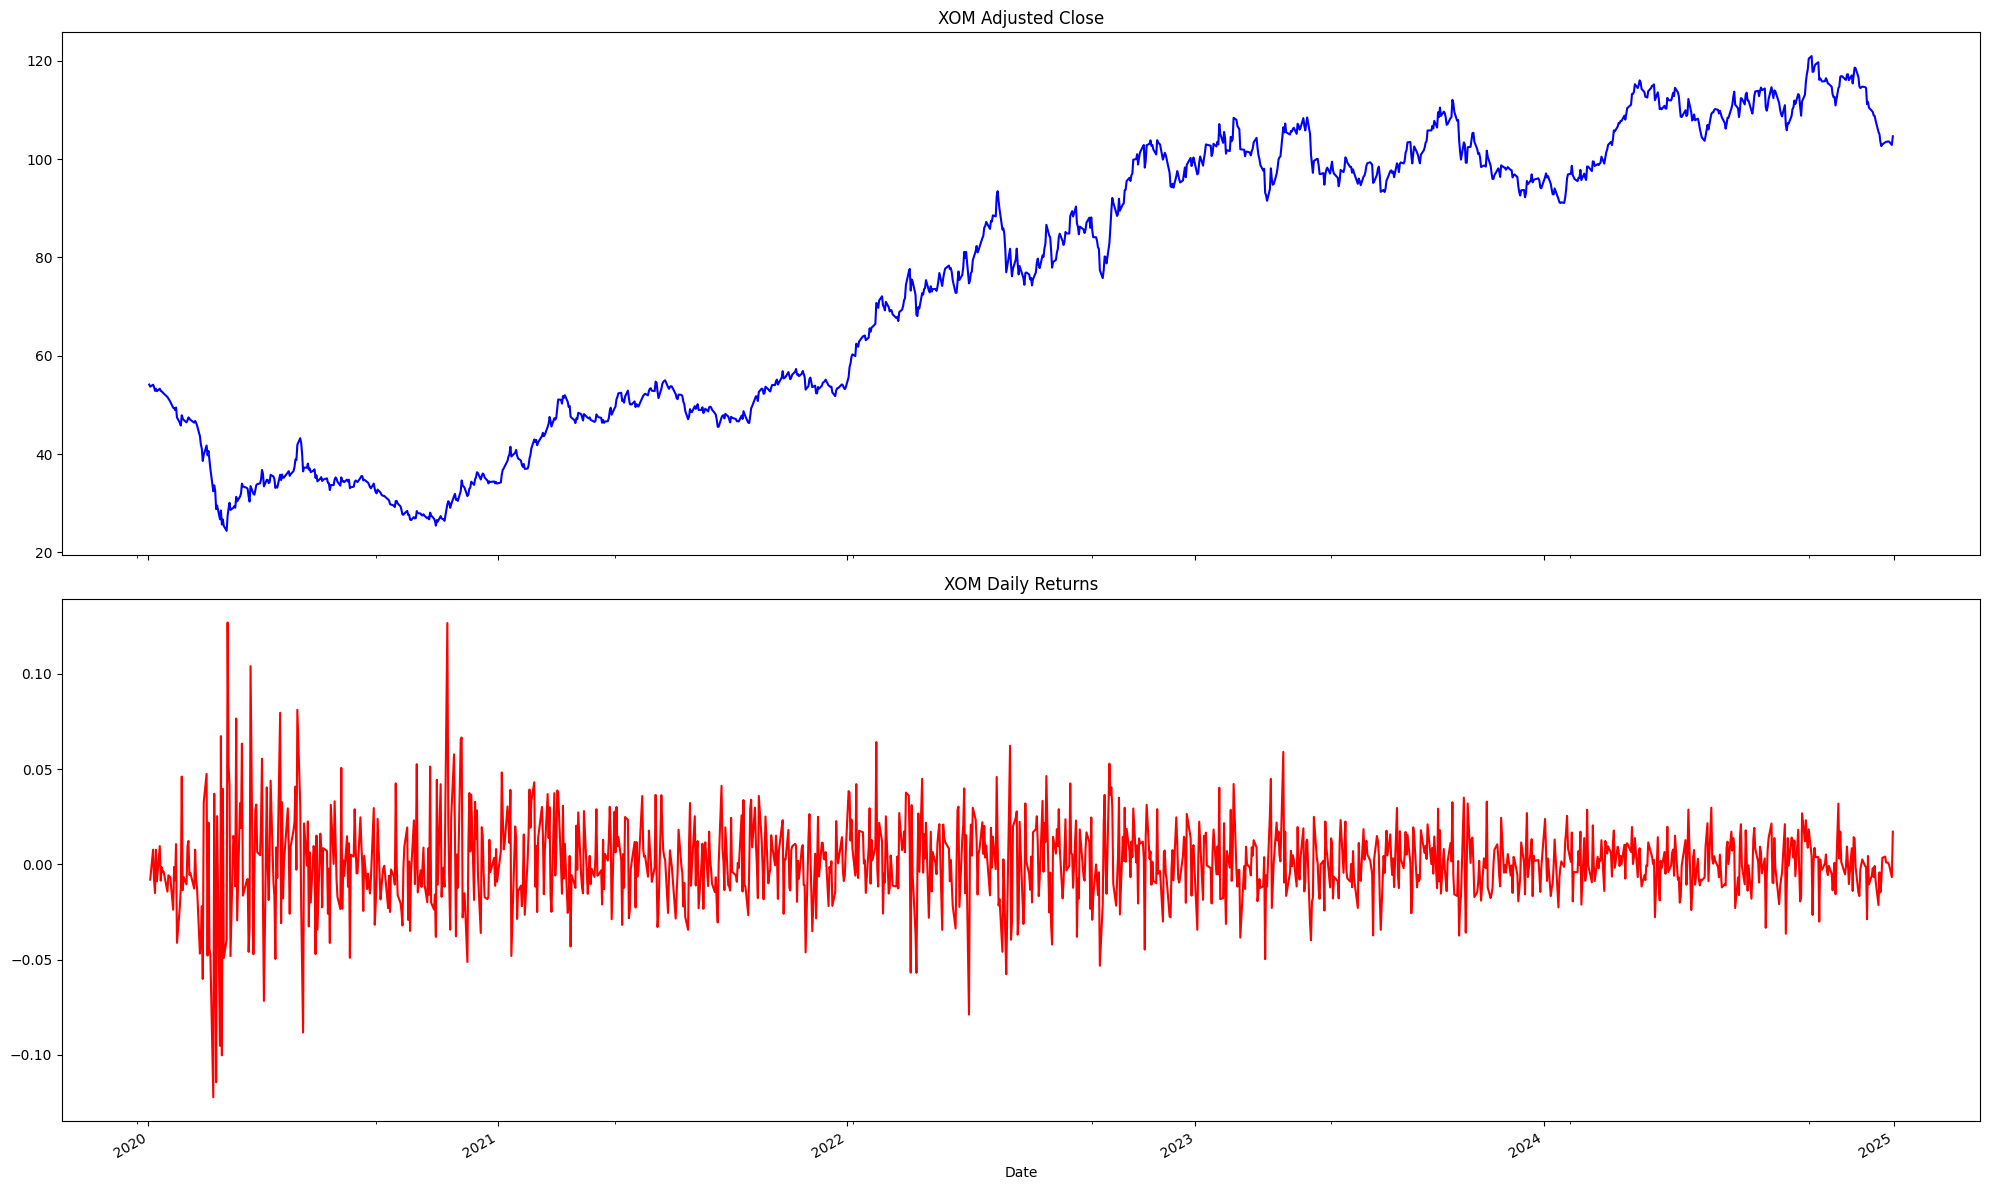

In [11]:
import seaborn as sns

for ticker in returns.columns:
    fig, axes = plt.subplots(2, 1, figsize=(20,12), sharex=True)

    # Price
    adj[ticker].plot(ax=axes[0], title=f"{ticker} Adjusted Close", color="blue")
    
    # Returns
    returns[ticker].plot(ax=axes[1], title=f"{ticker} Daily Returns", color="red")

    plt.tight_layout()
    plt.show()


In [12]:
mean_ret =  returns.mean()
mean_annual = mean_ret * 252
var_ret = returns.var()
corr_ret = returns.corr()
std_ret = returns.std()

In [13]:
for ticker in returns.columns:
    print(f"This is the mean for {ticker}: ", mean_ret[ticker])
    print(f"This is the variance for {ticker}: ", var_ret[ticker])
    print(f"This is the standard devaition for {ticker}: ", std_ret[ticker])
   

This is the mean for IEF:  -5.353972832393952e-05
This is the variance for IEF:  2.511619595385528e-05
This is the standard devaition for IEF:  0.0050116061251713785
This is the mean for JNJ:  0.0001793379844641198
This is the variance for JNJ:  0.00015332574584678378
This is the standard devaition for JNJ:  0.01238247737113958
This is the mean for KO:  0.0003084253963452115
This is the variance for KO:  0.00017168369720731887
This is the standard devaition for KO:  0.013102812568579269
This is the mean for MSFT:  0.0009878208887624475
This is the variance for MSFT:  0.0003690792552832118
This is the standard devaition for MSFT:  0.019211435534160683
This is the mean for NVDA:  0.0030498670708803627
This is the variance for NVDA:  0.0011519558913650554
This is the standard devaition for NVDA:  0.03394047570917437
This is the mean for SHY:  4.439594051775106e-05
This is the variance for SHY:  1.4703589387635336e-06
This is the standard devaition for SHY:  0.0012125835801145971
This is t

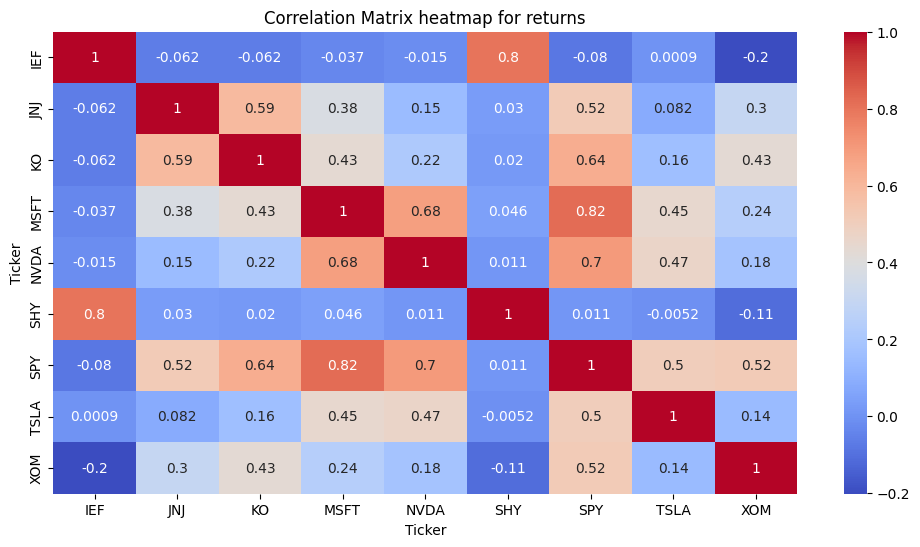

In [15]:

plt.figure(figsize=(12, 6))
sns.heatmap(corr_ret, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix heatmap for returns')
plt.savefig("figure/corr_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

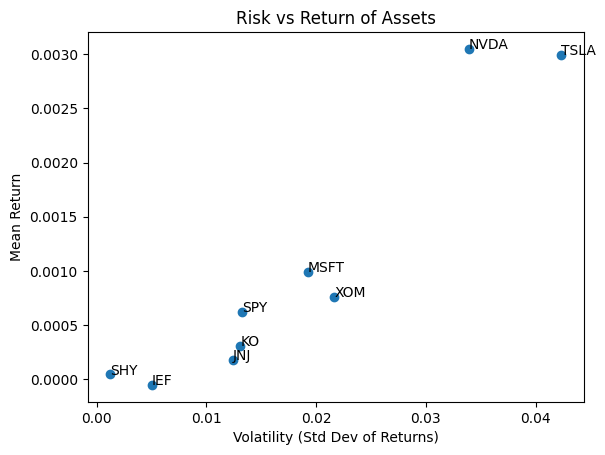

In [17]:
plt.scatter(std_ret, mean_ret)
for t in returns.columns:
    plt.annotate(t, (std_ret[t], mean_ret[t]))
plt.xlabel("Volatility (Std Dev of Returns)")
plt.ylabel("Mean Return")
plt.title("Risk vs Return of Assets")
plt.savefig('figure/risk_return')

In [18]:
# sharpe_ratio = mean_ret/std_ret

sharpe_ratio_annual = (mean_ret * 252) / (std_ret * np.sqrt(252))

In [19]:
# Compounded Annual Growth Rate ( CAGR)
'''
This is the smoothed annual growth rate of an investment.
'''

years = ( adj.index[-1] - adj.index[0]).days/ 365.25
cagr = (adj.iloc[-1] / adj.iloc[0] ) ** (1/years) - 1

In [20]:
skew= returns.skew()
kurt= returns.kurtosis()

In [21]:
summary = pd.DataFrame({
        "Mean Return (daily)": mean_ret,
        "Std Dev (daily)": std_ret,
        "Variance (daily)": var_ret,
        "Sharpe Ratio (ann.)": sharpe_ratio_annual,
        "CAGR (ann.)": cagr,
        "Skewness": skew,
        "Kurtosis": kurt
    })

print(summary.round(4))         

        Mean Return (daily)  Std Dev (daily)  Variance (daily)  \
Ticker                                                           
IEF                 -0.0001           0.0050            0.0000   
JNJ                  0.0002           0.0124            0.0002   
KO                   0.0003           0.0131            0.0002   
MSFT                 0.0010           0.0192            0.0004   
NVDA                 0.0030           0.0339            0.0012   
SHY                  0.0000           0.0012            0.0000   
SPY                  0.0006           0.0132            0.0002   
TSLA                 0.0030           0.0423            0.0018   
XOM                  0.0008           0.0217            0.0005   

        Sharpe Ratio (ann.)  CAGR (ann.)  Skewness  Kurtosis  
Ticker                                                        
IEF                 -0.1696      -0.0165    0.2440    2.5143  
JNJ                  0.2299       0.0262    0.4350    8.2944  
KO                   

## Exploratory Data Analysis (EDA) Insights

After analyzing the metrics and plots of all assets:

### 1. Asset Replacement
- **IEF** (long-term bonds) was removed because of its **negative Sharpe ratio** and **negative CAGR**, meaning it underperforms even a risk-free asset in the long term.  
- It is replaced with **SHY**, which provides more stability as a short-term bond ETF and serves as a better defensive anchor.

**Why SHY instead of IEF?**  
- SHY has much lower interest rate sensitivity than IEF, making it less volatile during rate changes.  
- Unlike IEF, SHY does not drag down long-term returns, while still providing the stabilizing role of bonds.  
- Including SHY ensures the portfolio has a defensive component that complements high-growth (TSLA, NVDA), 
  defensive (KO, JNJ), and cyclical (XOM) assets.

### 2. Growth vs Defensive Assets
- **High-growth, high-volatility assets**: TSLA and NVDA show strong CAGR and Sharpe ratios, but with high standard deviations and fat tails. They are strong return drivers but need risk controls.  
- **Defensive assets**: KO and JNJ show slower growth and lower Sharpe ratios, but provide stability. However, their high kurtosis indicates exposure to rare extreme events.

### 3. Cyclical Assets
- **XOM** shows strong Sharpe and CAGR, but its performance is tied to oil cycles. This makes it less defensive than KO or JNJ, though still a valuable diversifier with moderate fat tails.

### 4. Diversification Insight
- The mix of **growth, defensive, cyclical, and anchor assets** improves portfolio balance.  
- Diversification reduces concentration risk while maintaining profitability, as shown by positive Sharpe ratios and reasonable long-term CAGR values across the basket.

### 5. Implications for Optimization
- Insights from EDA help guide portfolio constraints:  
  - Limit exposure to volatile stocks like TSLA/NVDA despite their high returns.  
  - Maintain defensive exposure (KO, JNJ, SHY) to stabilize drawdowns.  
  - Use SPY as a broad-market anchor, balancing growth with diversification.

### How Correlation Was Used in This Project

The correlation heatmap highlights how closely assets move together.  
For example, NVDA and MSFT show a correlation of ~0.68, which is expected since both are large tech firms.  
While this does not mean such assets should be removed from the portfolio, it shows that they offer **less diversification benefit** when combined.  

Instead of excluding correlated assets, this insight is fed into the **optimization step**:  
- The optimizer will use the covariance matrix (built from correlations and variances) to account for redundancy in risk.  
- This ensures that highly correlated stocks are not over-allocated unless their returns justify it.  
- I can also apply constraints (e.g., capping tech stock weights) to prevent concentration risk.  

In summary, correlation analysis was not about dropping assets, but about **understanding clusters and diversification trade-offs** so that the optimizer can balance growth and stability more effectively.


### Risk vs Return Plot
This scatter plot shows each asset’s mean return (y-axis) against its volatility (x-axis).  
Assets toward the **top-left** are more efficient, delivering higher returns with less risk.  
For instance, NVDA appears more attractive than TSLA since it offers similar return with lower volatility.  
Meanwhile, IEF sits at the bottom with negative returns and low volatility, reinforcing the decision to replace it.


## Personal Note

This part of the analysis was not as straightforward as it first seemed. 
While defensive assets (like KO and JNJ) appear stable, their high kurtosis shows they are still exposed to rare extreme moves. 
On the other hand, high-growth assets (like TSLA and NVDA) show strong long-term returns (CAGR) but also carry high volatility. 
This mix of hidden risks and opportunities makes the portfolio design more challenging, but also more interesting, 
as it forces a deeper understanding of risk-return trade-offs rather than relying on simple labels like "defensive" or "growth."

This analysis also helped me better understand how to interpret key metrics such as **skewness, kurtosis, Sharpe ratio, and CAGR** 
in the context of portfolio optimization.


In [22]:
# Stocks for portfolio
assets_for_opt = [t for t in returns.columns if t != "IEF"]
returns_opt = returns[assets_for_opt]

In [56]:
opt_mean_ret = returns_opt.mean() * 252

cov_matrix_ret = returns_opt.cov()
cov_annual = cov_matrix_ret * 252
print(cov_annual)

Ticker       JNJ        KO      MSFT      NVDA       SHY       SPY      TSLA  \
Ticker                                                                         
JNJ     0.038638  0.024123  0.022720  0.015698  0.000112  0.021411  0.010863   
KO      0.024123  0.043264  0.027542  0.024241  0.000081  0.027738  0.022790   
MSFT    0.022720  0.027542  0.093008  0.112086  0.000270  0.052452  0.091479   
NVDA    0.015698  0.024241  0.112086  0.290293  0.000111  0.078738  0.168753   
SHY     0.000112  0.000081  0.000270  0.000111  0.000371  0.000043 -0.000067   
SPY     0.021411  0.027738  0.052452  0.078738  0.000043  0.044089  0.070971   
TSLA    0.010863  0.022790  0.091479  0.168753 -0.000067  0.070971  0.451336   
XOM     0.020314  0.030637  0.025385  0.033441 -0.000713  0.037332  0.033423   

Ticker       XOM  
Ticker            
JNJ     0.020314  
KO      0.030637  
MSFT    0.025385  
NVDA    0.033441  
SHY    -0.000713  
SPY     0.037332  
TSLA    0.033423  
XOM     0.118196  


In [24]:
print(opt_mean_ret)

Ticker
JNJ     0.045193
KO      0.077723
MSFT    0.248931
NVDA    0.768567
SHY     0.011188
SPY     0.155639
TSLA    0.755347
XOM     0.191290
dtype: float64


## Portfolio setup (Constraints and Objective)

**Constraints:**
- Portfolio weights must sum to 1
- all weights ≥ 0
- Maximum allocation of 20% per stock to avoid concentration
- Minimum allocation of 5% to SHY to ensure defensive exposure

**Objective Function:**
- Primary: Maximize Sharpe ratio (risk-adjusted return).

### Understanding the Covariance Matrix

The covariance matrix captures both the individual volatility of assets (diagonal values = variances) 
and how pairs of assets move together (off-diagonal values = covariances).  


The portfolio risk is not just the sum of individual risks, 
but also depends on how correlated the assets are.  
Low or negative covariance between assets reduces overall portfolio risk (diversification benefit).  


### Personal note
Although SHY has very low returns, it is included as a 5% minimum weight because of its stabilizing role. 
Its low volatility and positive skewness make it a defensive anchor that reduces portfolio risk, 
balancing the high-growth but volatile assets such as TSLA and NVDA.

Since the covariance matrix is symmetric and positive semi-definite, 
it can be decomposed into eigenvalues and eigenvectors. 
This links directly to concepts in PCA, where eigenvalues measure 
the amount of variance explained and eigenvectors define the principal directions of risk.


### My Understanding of the Efficient Frontier

The **efficient frontier** represents the set of optimal portfolios that deliver the highest expected return for a given level of risk (or the lowest risk for a given return).  
It is driven by diversification: lower covariance between assets reduces portfolio volatility, moving portfolios closer to the frontier.  

- Portfolios **on the frontier** are efficient (best balance of risk and return).  
- Portfolios **below the frontier** are inefficient (too much risk for the return).  
- Moving **rightward** along the frontier corresponds to risk-seeking investors accepting higher volatility for higher potential return.  
- Moving **leftward** corresponds to risk-averse investors preferring stability.  

**Limitations of the model:**  
- Assumes normally distributed returns, whereas real-world assets often have skewness and fat tails (as shown in my EDA).  
- Assumes unlimited borrowing/lending at the risk-free rate, which is unrealistic.  
- Ignores investor-specific preferences (e.g., some investors willingly accept inefficiency for higher upside potential).  

In practice, the efficient frontier provides a useful baseline for portfolio construction, but it must be adjusted for real-world factors like fat-tailed risks, market frictions, and behavioural biases.


In [57]:
from pypfopt import EfficientFrontier, plotting

ef = EfficientFrontier(opt_mean_ret, cov_matrix=cov_annual)

# Constraints
ef.add_constraint(lambda w : w[4] >= 0.05)      # SHY ≥ 5%
ef.add_constraint(lambda w : w <= 0.2)

# Objective
ef.max_sharpe()

# Get cleaned weights
weights = ef.clean_weights()
print(weights)



OrderedDict({'JNJ': 0.14057, 'KO': 0.07246, 'MSFT': 0.0, 'NVDA': 0.2, 'SHY': 0.2, 'SPY': 0.0, 'TSLA': 0.19999, 'XOM': 0.18698})


### Optimized Portfolio (Max Sharpe, with constraints)
- **High-growth drivers**: NVDA and TSLA both hit the 20% cap, confirming their strong expected returns.  
- **Defensive stabilizer**: SHY also hit its 20% cap, reducing volatility and improving Sharpe ratio.  
- **Diversifier**: XOM received ~19%, balancing cyclical oil exposure with tech-heavy holdings.  
- **Moderate defensive allocation**: JNJ (14%) and KO (7%) provide some downside protection.  
- **Excluded assets**: MSFT and SPY were dropped, likely due to high correlation with NVDA and the broader basket.  

**Interpretation:**  
The optimizer favoured a barbell-like portfolio: combining high-return tech (NVDA, TSLA) with maximum defensive exposure (SHY), while sprinkling in cyclical and defensive stocks for diversification.  


In [26]:
ret, vol, sharpe = ef.portfolio_performance(risk_free_rate=0.0, verbose=True)

print(f'This is the portfolio return: {ret}, variance: {vol}, sharpe: {sharpe}')

Expected annual return: 35.5%
Annual volatility: 24.2%
Sharpe Ratio: 1.47
This is the portfolio return: 0.3547645103321937, variance: 0.24188055617650286, sharpe: 1.466692965900567


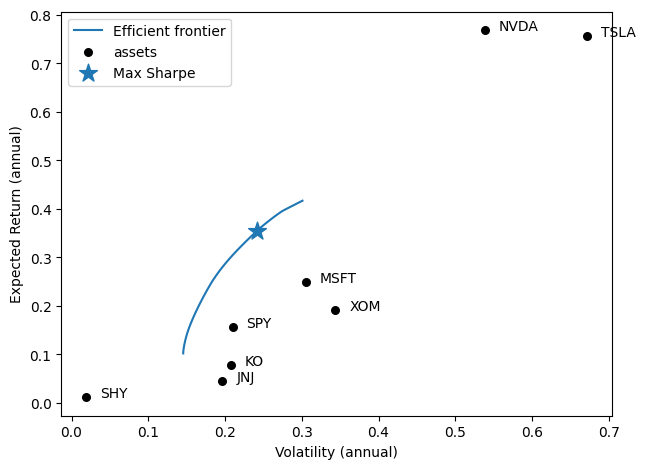

In [74]:
ef_plot = EfficientFrontier(opt_mean_ret, cov_matrix=cov_annual)
ef_plot.add_constraint(lambda w: w[4] >= 0.05)
ef_plot.add_constraint(lambda w: w <= 0.20)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef_plot, ax=ax, show_assets=True)

# overlay your optimized portfolio from the solved ef
ret, vol, _ = ef.portfolio_performance(risk_free_rate=0.0)
ax.scatter(vol, ret, marker="*", s=180, label="Max Sharpe", zorder=5)

for i, ticker in enumerate(opt_mean_ret.index):
    ax.annotate(ticker,
                (np.sqrt(cov_annual.values[i, i]), opt_mean_ret.values[i]),
                xytext=(10,0), textcoords="offset points")

ax.set_xlabel("Volatility (annual)")
ax.set_ylabel("Expected Return (annual)")
ax.legend()
plt.savefig("figure/ef")
plt.show()

## Rebalancing

In [28]:
returns_opt.head()

Ticker,JNJ,KO,MSFT,NVDA,SHY,SPY,TSLA,XOM
Date,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.011578,-0.005455,-0.012451,-0.016006,0.000826,-0.007572,0.029633,-0.008039
2020-01-06,-0.001248,-0.000366,0.002585,0.004194,-0.000354,0.003815,0.019255,0.007678
2020-01-07,0.006107,-0.007682,-0.009118,0.012107,0.000000,-0.002812,0.038801,-0.008184
2020-01-08,-0.000138,0.001843,0.015929,0.001876,-0.000472,0.005330,0.049205,-0.015080


In [29]:
print(weights)

OrderedDict({'JNJ': 0.14057, 'KO': 0.07246, 'MSFT': 0.0, 'NVDA': 0.2, 'SHY': 0.2, 'SPY': 0.0, 'TSLA': 0.19999, 'XOM': 0.18698})


In [ ]:

def simulate_rebalance(
    returns: pd.DataFrame,
    target_weights: pd.Series,
    *,
    init_capital: float = 1_000.0,
    freq: str | None = "M",          # "M", "Q", "Y" or None (disable periodic)
    threshold: float | None = None,  # e.g. 0.05 band; None disables threshold trigger
    tc_bps: float = 0.0              # transaction cost in decimal (e.g. 0.0005 = 5 bps)
) -> pd.DataFrame:
    """
    Simulate portfolio with periodic and/or threshold rebalancing.

    Parameters
    
    returns : DataFrame
        Daily (or periodic) returns, index = dates, columns = tickers.
    target_weights : Series
        Target weights, index must match returns.columns.
    init_capital : float
        Starting portfolio value.
    freq : {"M","Q","Y", None}
        Periodic rebalance cadence (month/quarter/year end). None disables periodic.
    threshold : float or None
        Absolute weight deviation band (e.g., 0.05). None disables threshold.
    tc_bps : float
        Proportional trading cost  (e.g., 0.0005 = 5 bps). Transaction cost per currency

    Returns
    
    log_df : DataFrame
        Daily log with columns: pv, rebalanced, turnover, costs, and weights per asset.
    """
    # alignment 
    returns = returns.copy().sort_index()
    returns = returns.dropna(how="any")

    target_weights = target_weights.copy().reindex(returns.columns)
    assert np.isclose(target_weights.sum(), 1.0), "target_weights must sum to 1"
    assert target_weights.index.equals(returns.columns), "target_weights must align with returns.columns"

    period_flags = pd.Series(False, index=returns.index)

    # helpers for periodic trigger 
    if freq is None:
        period_ends = pd.DatetimeIndex([])
       
    else:
        # month/quarter/year ends on calendar
        # keep only dates that exist in returns index
    
        last_idx_each_period = (
        returns.groupby(returns.index.to_period(freq)).tail(1).index
        )
        period_ends = returns.index.intersection(last_idx_each_period)
        period_flags = pd.Series(returns.index.isin(period_ends), index=returns.index)
       

    # state
    pv = float(init_capital)
    holding = pv * target_weights  #  holdings vector
    log_rows = []

    # main loop
    for day, r in returns.iterrows():
        if r.isna().any():
            log_rows.append({"date": day, "pv": pv, "rebalanced": False, "turnover": 0.0, "costs": 0.0})
            continue

        #  apply market move (drift)

        # r = r.fillna(0.0)
        holding = holding.mul(1.0 + r, fill_value=0.0)      #*= (1.0 + r.values)
        pv = float(holding.sum())
        curr_w = holding / pv

        # triggers
        
        periodic_trigger = bool(period_flags.loc[day])
        threshold_trigger = False
        if threshold is not None:

            # Option A — portfolio-level drift (L1 distance across all names):
            # Rebalance if the total absolute weight gap exceeds the threshold.
            # threshold_trigger = (curr_w.sub(target_weights).abs().sum() > total_threshold)

            # Option B — per-name drift:
            # Rebalance if ANY asset’s absolute weight gap exceeds the threshold. 
            threshold_trigger = (curr_w.sub(target_weights).abs() > threshold).any()    

        if not (periodic_trigger or threshold_trigger):
            log_rows.append({
                "date": day, "pv": pv, "rebalanced": False,
                "turnover": 0.0, "costs": 0.0, **{f"w_{c}": curr_w[c] for c in curr_w.index}
            })
            continue

        # compute trades to targets
        target_cash = pv * target_weights
        trades = target_cash - holding

        # turnover & costs
        turnover = float(np.abs(trades).sum() / pv)   # fraction of the portfolio traded
        costs = float(turnover * tc_bps * pv)

        # deduct costs from PV, then rescale targets
        pv -= costs
        target_cash = pv * target_weights

        # execute rebalance (snap to targets)
        holding = target_cash.copy()
        curr_w = holding / pv

        # log
        log_rows.append({
            "date": day, "pv": pv, "rebalanced": True,
            "turnover": turnover, "costs": costs, **{f"w_{c}": curr_w[c] for c in curr_w.index}
        })

    log_df = pd.DataFrame(log_rows).set_index("date")
    return log_df


In [31]:
log_monthly = simulate_rebalance(
    returns_opt, pd.Series(weights), freq="M", threshold=None, tc_bps=0.0005
)
print("Rebalances:", log_monthly["rebalanced"].sum())

log_quarterly=  simulate_rebalance(
    returns_opt, pd.Series(weights), freq="Q", threshold=None, tc_bps=0.0005
)
print("Rebalances:", log_quarterly["rebalanced"].sum())

log_yearly = simulate_rebalance(
    returns_opt, pd.Series(weights), freq="Y", threshold=None, tc_bps=0.0005
)
print("Rebalances:", log_yearly["rebalanced"].sum())
buy_and_hold =  simulate_rebalance(
    returns_opt, pd.Series(weights), freq=None, threshold=None, tc_bps=0.0005
)
print("Rebalances:", buy_and_hold["rebalanced"].sum())

log_thres_05 =  simulate_rebalance(
    returns_opt, pd.Series(weights), freq=None, threshold=0.05, tc_bps=0.0005
)
print("Rebalances:", log_thres_05["rebalanced"].sum())

Rebalances: 60
Rebalances: 20
Rebalances: 5
Rebalances: 0
Rebalances: 29


In [33]:
returns_opt.head()

Ticker,JNJ,KO,MSFT,NVDA,SHY,SPY,TSLA,XOM
Date,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.011578,-0.005455,-0.012451,-0.016006,0.000826,-0.007572,0.029633,-0.008039
2020-01-06,-0.001248,-0.000366,0.002585,0.004194,-0.000354,0.003815,0.019255,0.007678
2020-01-07,0.006107,-0.007682,-0.009118,0.012107,0.000000,-0.002812,0.038801,-0.008184
2020-01-08,-0.000138,0.001843,0.015929,0.001876,-0.000472,0.005330,0.049205,-0.015080


In [34]:
log_monthly.head()

,pv,rebalanced,turnover,costs,w_JNJ,w_KO,w_MSFT,w_NVDA,w_SHY,w_SPY,w_TSLA,w_XOM
date,,,,,,,,,,,,
2020-01-03,999.364373,False,0.0,0.0,0.139031,0.072111,0.0,0.196924,0.200293,0.0,0.206047,0.185595
2020-01-06,1005.308085,False,0.0,0.0,0.138036,0.071658,0.0,0.196581,0.199038,0.0,0.208773,0.185914
2020-01-07,1014.608561,False,0.0,0.0,0.137606,0.070456,0.0,0.197137,0.197213,0.0,0.214886,0.182702
2020-01-08,1022.934237,False,0.0,0.0,0.136468,0.070011,0.0,0.195899,0.195516,0.0,0.223624,0.178482
2020-01-09,1023.254972,False,0.0,0.0,0.136829,0.071264,0.0,0.197988,0.195478,0.0,0.218648,0.179792


In [ ]:
def compute_metrics(log_df: pd.DataFrame, rf_annual: float = 0.0, period: int= 0  ):
    """
    Compute quick metrics from the simulation log.
    rf_annual: annual risk-free rate as decimal.
    Returns a dict of metrics.
    """
    pv = log_df["pv"].astype(float)
    # Daily/periodic returns of the equity curve
    r = pv.pct_change().dropna()

    # Time scaling
    periods_per_year = 252  # always daily in setup

    years = (log_df.index[-1] - log_df.index[0]).days / 365.25

    # CAGR
    cagr = np.nan
    if years > 0 and pv.iloc[0] > 0:
        cagr = (pv.iloc[-1] / pv.iloc[0]) ** (1.0 / years) - 1.0

    # Daily stats
    mean_d = r.mean()
    std_d  = r.std(ddof=1)
    rf_d   = (1 + rf_annual) ** (1/periods_per_year) - 1

    sharpe_daily = (mean_d - rf_d) / std_d if std_d > 0 else np.nan

    # Volatility & Sharpe (annualised)
    ann_ret = mean_d * periods_per_year
    ann_vol = std_d * np.sqrt(periods_per_year)
    sharpe  = (ann_ret - rf_annual) / ann_vol

    # Max drawdown
    roll_max = pv.cummax()
    dd = pv / roll_max - 1.0
    max_dd = dd.min()

    # Turnover & costs
    total_costs = float(log_df["costs"].sum())
    n_rebalances = int(log_df["rebalanced"].sum())
    avg_turnover = float(log_df.loc[log_df["rebalanced"], "turnover"].mean())

    return {
        "periods_per_year": periods_per_year,
        "years": years,
        "final_pv": float(pv.iloc[-1]),
        "CAGR": float(cagr),
        "ann_vol": float(ann_vol),
        "expected_return": float(ann_ret),
        "Sharpe": float(sharpe),
        "Sharpe_daily": float(sharpe_daily),
        "max_drawdown": float(max_dd),
        "total_costs": total_costs,
        "n_rebalances": n_rebalances,
        "avg_turnover": avg_turnover,
    }

In [36]:
metrics = compute_metrics(log_monthly, rf_annual=0.0, period=12)  
print(metrics)

quarterly_metric = compute_metrics(log_quarterly, rf_annual=0.0, period=4)
print(quarterly_metric)

yearly_metric = compute_metrics(log_yearly, rf_annual=0.0, period=1)
print(yearly_metric)

thres_metric = compute_metrics(log_thres_05, rf_annual=0.0, period=1)
print(thres_metric)

buy_and_hold_metric = compute_metrics(buy_and_hold, rf_annual=0.0, period=1)
print(buy_and_hold_metric)


{'periods_per_year': 252, 'years': 4.993839835728953, 'final_pv': 5143.968892231495, 'CAGR': 0.3883227712021795, 'ann_vol': 0.2403371854142219, 'expected_return': 0.3579049154567309, 'Sharpe': 1.4891782760952312, 'Sharpe_daily': 0.0938094137235206, 'max_drawdown': -0.33617077384727534, 'total_costs': 6.125311329538498, 'n_rebalances': 60, 'avg_turnover': 0.07771120566018903}
{'periods_per_year': 252, 'years': 4.993839835728953, 'final_pv': 5807.746153625715, 'CAGR': 0.4224771846193034, 'ann_vol': 0.25186626242523724, 'expected_return': 0.38517340923967847, 'Sharpe': 1.5292775043819593, 'Sharpe_daily': 0.09633542767143224, 'max_drawdown': -0.35593253457469, 'total_costs': 4.594593006587743, 'n_rebalances': 20, 'avg_turnover': 0.15892103541900832}
{'periods_per_year': 252, 'years': 4.993839835728953, 'final_pv': 9100.25071295114, 'CAGR': 0.5563331767790769, 'ann_vol': 0.284803954925707, 'expected_return': 0.48425145642564066, 'Sharpe': 1.7002975136070737, 'Sharpe_daily': 0.10710867561489

### Understanding Rebalancing

Rebalancing is done to keep a portfolio aligned with its predefined optimal weight allocation.  
Without rebalancing, stock weights drift as prices move, often favouring high-volatility stocks, which may not match the investor’s intended risk profile.  
Rebalancing brings weights back to their targets.  
It is also important to periodically reassess whether the original “optimal” weights are still valid, given the investor’s current constraints and objectives.

In this project, two types of rebalancing were implemented:

- **Threshold rebalancing**: allow weights to drift until a threshold is breached, then reset back to target weights.  
  I explored two variants:  
  1. Trigger only when the **entire portfolio** drifted beyond the threshold.  
  2. Trigger when **any individual asset** weight drifted beyond the threshold.  
  The second method (asset-level) gave higher CAGR and Sharpe ratio.

- **Periodic rebalancing**: rebalance on a fixed schedule (monthly, quarterly, or yearly).  
  Between rebalances, weights drift naturally until the set date.  

These strategies were compared against a Buy-and-Hold portfolio (no rebalancing).

### Key Findings
- **Yearly rebalancing** performed best overall, with the highest CAGR and Sharpe ratio, and relatively low volatility.  
- Its max drawdown was around **-0.356** (≈ -35.6%).  
  - *Interpretation*: this means the portfolio’s value fell by about 35.6% from a peak to a trough before recovering, a standard risk measure.  
- Yearly rebalancing had the second-highest costs (5.55) and the highest average turnover, since weights were allowed to drift further before being reset.

- **Threshold rebalancing (5%)** provided a balanced trade-off, limiting turnover (less than yearly rebalancing) while maintaining a competitive Sharpe ratio of ~1.5.  

### Conclusion
This confirms that rebalancing not only improves portfolio efficiency but also significantly reduces downside risk compared to Buy-and-Hold.

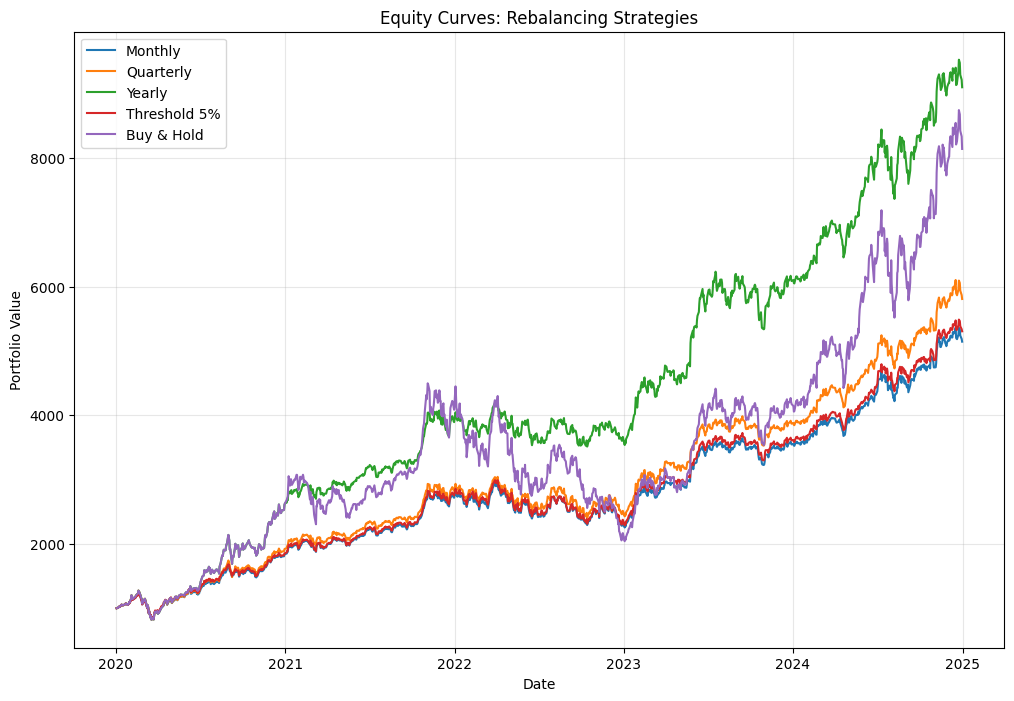

In [38]:
plt.figure(figsize=(12,8))

plt.plot(log_monthly.index, log_monthly["pv"], label="Monthly")
plt.plot(log_quarterly.index, log_quarterly["pv"], label="Quarterly")
plt.plot(log_yearly.index, log_yearly["pv"], label="Yearly")
plt.plot(log_thres_05.index, log_thres_05["pv"], label="Threshold 5%")
plt.plot(buy_and_hold.index, buy_and_hold["pv"], label="Buy & Hold")

plt.title("Equity Curves: Rebalancing Strategies")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


**Interpretation:**  
- Yearly rebalancing achieved the highest terminal value with strong risk-adjusted returns (Sharpe ~1.70).  
- Monthly and quarterly rebalancing tracked weights tightly but with lower CAGR due to higher turnover.  
- Buy-and-Hold delivered high growth but with much larger volatility and drawdowns.  

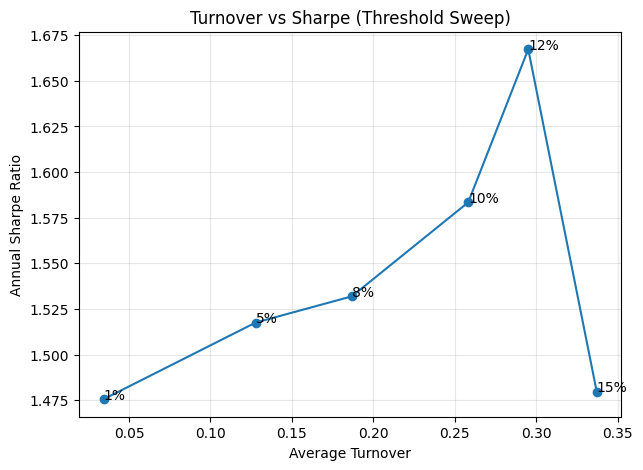

   Threshold    Sharpe  AvgTurnover   ann_vol  max_drawdown
0      0.010  1.475564     0.034365  0.242033     -0.330784
1      0.050  1.517542     0.127708  0.239841     -0.327507
2      0.075  1.531930     0.186805  0.243520     -0.332040
3      0.100  1.583429     0.258243  0.245653     -0.324415
4      0.125  1.667300     0.295086  0.241530     -0.319384
5      0.150  1.479664     0.337137  0.261742     -0.355933


In [72]:
# Further exploration of different thresholds

thresholds = [0.01, 0.05, 0.075, 0.10, 0.125, 0.15]
results = []

for th in thresholds:
    log = simulate_rebalance(returns_opt, pd.Series(weights),
                             freq=None, threshold=th, tc_bps=0.0005)
    m = compute_metrics(log, rf_annual=0.0)
    results.append((th, m["Sharpe"], m["avg_turnover"], m["ann_vol"], m["max_drawdown"]))

df = pd.DataFrame(results, columns=["Threshold", "Sharpe", "AvgTurnover", "ann_vol", "max_drawdown"])

plt.figure(figsize=(7,5))
plt.plot(df["AvgTurnover"], df["Sharpe"], marker="o")
for i,row in df.iterrows():
    plt.text(row["AvgTurnover"], row["Sharpe"], f"{row['Threshold']:.0%}")
plt.title("Turnover vs Sharpe (Threshold Sweep)")
plt.xlabel("Average Turnover")
plt.ylabel("Annual Sharpe Ratio")
plt.grid(True, alpha=0.3)
plt.show()

print(df)


## Further Threshold Exploration

Portfolio performance was analysed under varying drift thresholds (1% to 15%). As expected, higher thresholds allowed more drift before rebalancing, which increased average turnover.

The results show that Sharpe ratio is not monotonically proportional to the threshold. Sharpe improves gradually up to a 12.5% threshold, where it peaks at 1.66 with volatility of 0.24 and max drawdown of −0.32. Beyond this point, at 15%, Sharpe drops sharply back to 1.48 despite higher turnover.

A 12.5% threshold therefore appears efficient, balancing rebalancing costs and risk-adjusted return. For comparison, strict yearly rebalancing produces a slightly higher Sharpe (1.70) but with higher volatility (0.28) and worse max drawdown (−0.36).

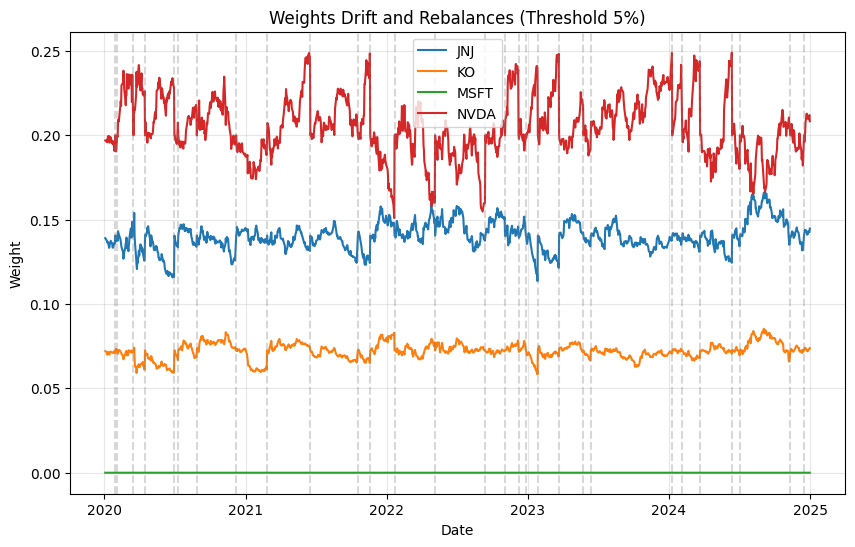

In [40]:
assets_to_plot = returns_opt.columns[:4]   # first 4 assets

plt.figure(figsize=(10,6))
for col in assets_to_plot:
    plt.plot(log_thres_05.index, log_thres_05[f"w_{col}"], label=col)

# Mark rebalance points
rebal_days = log_thres_05[log_thres_05["rebalanced"]].index
for d in rebal_days:
    plt.axvline(d, color="grey", linestyle="--", alpha=0.3)

plt.title("Weights Drift and Rebalances (Threshold 5%)")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



**Interpretation:**  
- High-growth assets (e.g., NVDA) frequently drift upward in weight.  
- Vertical dashed lines mark rebalance events, showing weights snapping back toward targets.  
- Defensive holdings (e.g., JNJ, KO) show more stable weights, with smaller adjustments at rebalancing. 

# Monte Carlo and Risk Analysis
## GBM

In [ ]:
lg_rtn = returns_opt.apply(np.log1p)
mean_lg_rtn = lg_rtn.mean().values
cov_log_rtn = lg_rtn.cov().values
assets = lg_rtn.columns



In [42]:
print(assets)

Index(['JNJ', 'KO', 'MSFT', 'NVDA', 'SHY', 'SPY', 'TSLA', 'XOM'], dtype='object', name='Ticker')


In [43]:
print(weights)

OrderedDict({'JNJ': 0.14057, 'KO': 0.07246, 'MSFT': 0.0, 'NVDA': 0.2, 'SHY': 0.2, 'SPY': 0.0, 'TSLA': 0.19999, 'XOM': 0.18698})


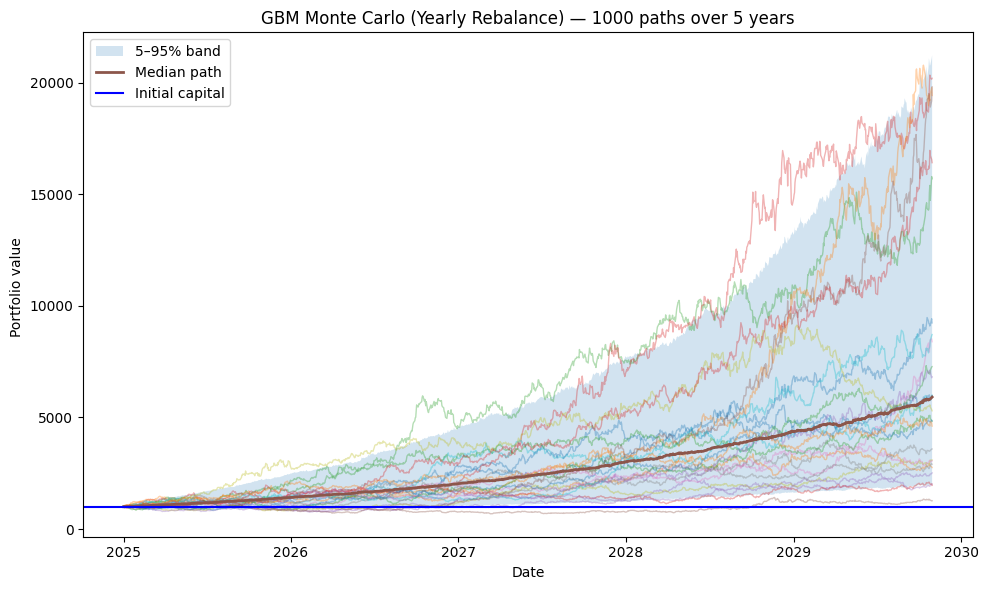

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
from pandas.tseries.offsets import BDay 

np.random.seed(42)

horizon_days = 252 * 5
n_paths = 1000
start_after = returns_opt.index[-1]

sim= []
pv_paths = np.empty((n_paths, horizon_days))
for i in range(n_paths):

    # Draw daily log-returns from a multivariate Normal with empirical mean and cov
    x = np.random.multivariate_normal(mean=mean_lg_rtn, cov=cov_log_rtn, size=horizon_days)  # shape: (T, n_assets)

    # Convert log-returns to simple returns
    R = np.exp(x) - 1.0      # shape: (T, n_assets)

    # Give those returns a future business-day index
    idx = pd.bdate_range(start=start_after + BDay(1), periods=horizon_days)
    R_df = pd.DataFrame(R, index=idx, columns=assets)

    # Run the portfolio engine on the simulated returns
    log_i = simulate_rebalance(returns=R_df, target_weights=pd.Series(weights), init_capital=1000, freq="Y", threshold=None, tc_bps=0.0005)

    # Store the simulated equity curve and compute summary metrics
    pv_paths[i, :len(log_i["pv"])] = log_i["pv"].to_numpy()
    m = compute_metrics(log_i)
    m['path'] = i
    sim.append(m)

results_sim = pd.DataFrame(sim)



p5, p50, p95 = np.percentile(pv_paths, [5, 50, 95], axis=0)

plt.figure(figsize=(10, 6))
for j in range(min(25, n_paths)):  # avoid cluster
    plt.plot(idx, pv_paths[j], alpha=0.35, linewidth=1)

plt.fill_between(idx, p5, p95, alpha=0.2, label="5–95% band")
plt.plot(idx, p50, linewidth=2, label="Median path")
plt.xlabel('Date')
plt.ylabel('Portfolio value ')
plt.title(f"GBM Monte Carlo (Yearly Rebalance) — {n_paths} paths over 5 years")
plt.axhline(y = 1000, color = 'b', linestyle = '-', label="Initial capital")
plt.legend()
plt.tight_layout()
plt.savefig('figures/monte_carlo_gbm.png')
plt.show()

In [45]:
results_sim["final_pv"] = pv_paths[:, -1]

metric_candidates = ["CAGR", "ann_vol", "Sharpe", "max_drawdown", "total_costs", "final_pv"]
metrics_cols = [c for c in metric_candidates if c in results_sim.columns]

# Percentiles (5th/25th/50th/75th/95th)
quant = results_sim[metrics_cols].quantile([.05, .25, .50, .75, .95])
quant.index = ["p05", "p25", "p50", "p75", "p95"]

# Mean & median rows
mean_row   = results_sim[metrics_cols].mean().to_frame().T
mean_row.index = ["mean"]
median_row = results_sim[metrics_cols].median().to_frame().T
median_row.index = ["median"]

summary_table = pd.concat([mean_row, median_row, quant], axis=0)
summary_table

,CAGR,ann_vol,Sharpe,max_drawdown,total_costs,final_pv
mean,0.470515,0.278260,1.421326,-0.290641,4.141480,7960.810755
median,0.444057,0.277627,1.422035,-0.279904,2.997516,5914.970598
p05,0.150016,0.252235,0.655206,-0.421706,0.953101,1974.330813
p25,0.309518,0.265084,1.094273,-0.330150,1.810465,3654.117659
p50,0.444057,0.277627,1.422035,-0.279904,2.997516,5914.970598
p75,0.608795,0.290518,1.729120,-0.241413,5.217183,9917.129195
p95,0.888424,0.306893,2.194618,-0.197905,10.584068,21234.153648


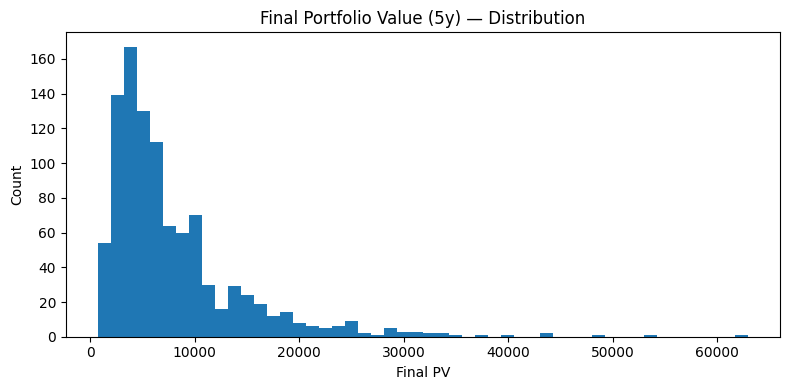

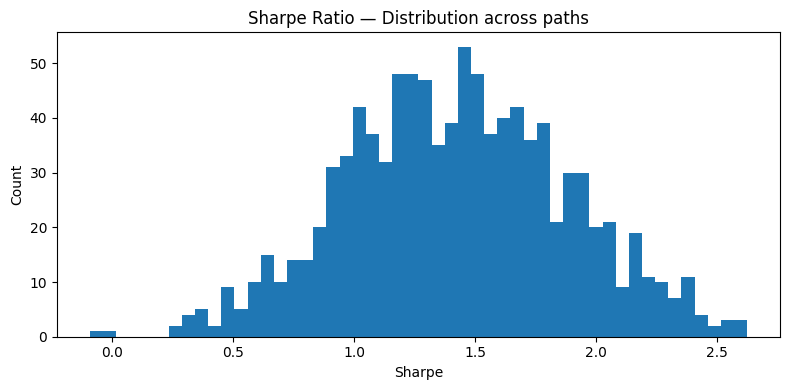

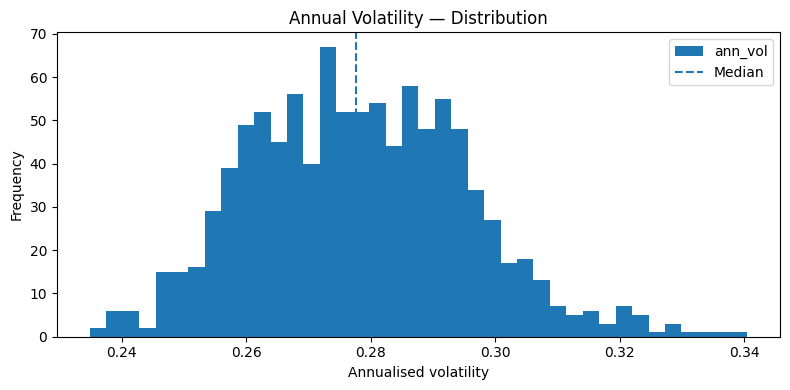

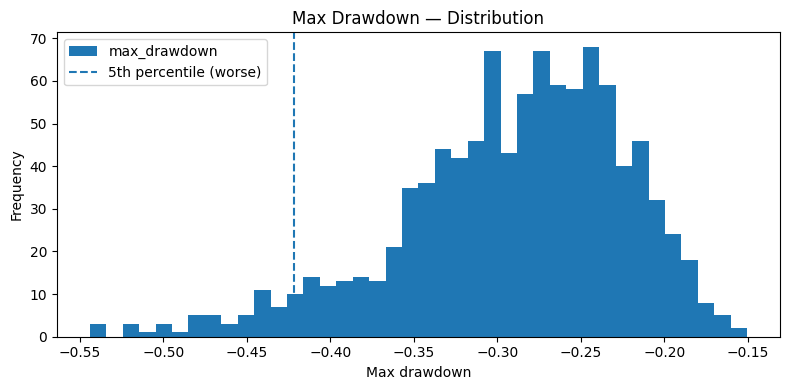

In [73]:
#import matplotlib.pyplot as plt

# Final PV distribution
if "final_pv" in results_sim:
    plt.figure(figsize=(8,4))
    results_sim["final_pv"].plot(kind="hist", bins=50)
    plt.title("Final Portfolio Value (5y) — Distribution")
    plt.xlabel("Final PV")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig("figure/PV_distribution_monte_carlo_gbm")
    plt.show()

# Sharpe distribution
if "Sharpe" in results_sim:
    plt.figure(figsize=(8,4))
    results_sim["Sharpe"].plot(kind="hist", bins=50)
    plt.title("Sharpe Ratio — Distribution across paths")
    plt.xlabel("Sharpe")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig("figure/sharpe_distribution_monte_carlo_gbm")
    plt.show()

if "ann_vol" in results_sim:
    plt.figure(figsize=(8,4))
    results_sim["ann_vol"].plot(kind="hist", bins=40)
    plt.axvline(results_sim["ann_vol"].median(), linestyle="--", label="Median")
    plt.title("Annual Volatility — Distribution")
    plt.xlabel("Annualised volatility")
    plt.legend() 
    plt.tight_layout()
    plt.savefig("figure/ann_vol_distribution_monte_carlo_gbm")
    plt.show()

# c) Worst-case drawdowns
if "max_drawdown" in results_sim:
    plt.figure(figsize=(8,4))
    results_sim["max_drawdown"].plot(kind="hist", bins=40)
    plt.axvline(results_sim["max_drawdown"].quantile(.05), linestyle="--", label="5th percentile (worse)")
    plt.title("Max Drawdown — Distribution")
    plt.xlabel("Max drawdown")
    plt.legend()
    plt.tight_layout()
    plt.savefig("figure/max_drawdown_distribution_monte_carlo_gbm")
    plt.show()



### My notes on Monte Carlo Simulation using GBM

A Geometric Brownian Motion (GBM) framework was applied to simulate portfolio evolution over a 5-year horizon. The simulation used 1000 random paths based on the empirical mean and covariance of log returns. Each path started with an initial capital of 1000 and was rebalanced annually.

- **Pathwise behaviour**: Simulations showed a wide dispersion of outcomes, with most paths clustering around moderate growth but with occasional extreme outliers due to compounding and stochastic shocks. The median trajectory remained smooth, while the 5–95% percentile band captured the uncertainty range at each point in time.

- **Final distribution of outcomes**:  
  - Final portfolio values were positively skewed, with most outcomes between 2k–10k, but extreme scenarios reaching over 60k.  
  - The Sharpe ratio distribution centred around ~1.4, though some paths delivered ratios close to 0, while others exceeded 2.0.  
  - Annualised volatility remained stable across paths, clustering around 0.27.  
  - Maximum drawdowns averaged around -30%, with the 5th percentile showing deeper losses near -42%.

These results highlight that while the portfolio demonstrates attractive long-term growth potential with strong risk-adjusted returns, there remains significant tail risk. GBM captures the compounding and volatility clustering in returns but, being normally distributed in log space, does not fully capture fat tails compared to alternatives such as Student’s t-distribution.


## Next Improvements

1. **Explore alternative optimisation objectives (beyond Max Sharpe)**
   - *Minimum Volatility*: simple risk-only baseline with very stable weights.  
   - *Efficient Risk (target volatility)*: maximise return for a chosen volatility budget.  
   - *Efficient Return (target return)*: minimise risk while meeting a return target.  
   - *Quadratic Utility (mean–variance with risk aversion)*: more stable, does not require positive expected return above the risk-free rate.  
   - *Risk Parity / HRP*: diversification-first baselines, less sensitive to return estimation.

2. **Add more user controls to the dashboard**
   - *Objective selection*: dropdown to choose between Max Sharpe, Min Vol, Efficient Risk, etc.   
   - *Constraints*: per-asset caps/floors. 
   - *Parameters*: sliders for blend weight, risk aversion, target volatility/return.   
   - *OOS window*: date pickers to define in-sample vs out-of-sample evaluation.

3. **Evaluation and robustness checks**
   - *OOS backtest*: fix weights on an in-sample window and evaluate on a future out-of-sample window.  
   - *Baselines*: compare against 1/N, Min Vol.

4. **Risk analysis**
   - Replace the current GBM with a Monte Carlo simulation that accounts for fat tails in asset returns (e.g., Student’s t ).

5. **Incorporate model predictions into expected returns**
   - **Ranking-based signal (cross-sectional z-scores):** At each rebalance date, convert model predictions into z-scores across the asset universe. Standardise within the day and use this as the expected-return vector. This lets the optimiser exploit relative ordering while shrinking magnitudes toward zero.
   - **Blended expected returns (history + predictions):** Combine historical annualised means with a tilt from model predictions (e.g., z-scored predictions mapped to annual units, blended at 20–30%). This preserves sensible long-run averages while still allowing model signals to nudge portfolio weights.

6. **Improve data handling**
   - Implement a more efficient way of storing and accessing price data from Yahoo Finance, rather than downloading it at every run.
